In [1]:
# 한글폰트
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonte-nanum* -qq

import matplotlib.font_manager as fm
fm._rebuild()

# 한글 폰트 확인하기
for fontInfo in fm.fontManager.ttflist:
  if 'Nanum' in fontInfo.name:
    print(fontInfo.name + ' = '+fontInfo.fname)

plt.rc('font', family = 'NanumGothic')

# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

E: Unable to locate package fonte-nanum*
E: Couldn't find any package by glob 'fonte-nanum*'
E: Couldn't find any package by regex 'fonte-nanum*'
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf


# Data Description

1. 가격 예측시, 수입용도, 수입형태 등 제공데이터와 동일하게 세분화하여 제출하여야 하나요? 
 - 상세 어종별 평균단가를 예측하시면 됩니다.
2. 각 용어의 의미는?
 - 수출국 : 원료를 수입하여 가공 후 반제품 또는 최종제품형태로 제조하여 수출하는 국가 
 - 제조국 : 원료를 생산 또는 생산·가공하는 국가
 (예시)
 ① 명태포(필렛)의 경우, 원료의 제조국(원산지)은 러시아지만, 필렛으로 가공하여 한국으로 수출 시 수출국은 중국입니다. 
   이 경우, 제조국(원산지) – 러시아, 수출국 – 중국입니다. 
 ② 러시아산 명태를 중국에서 단순 명태포(필렛)으로 가공하고, 반제품 형태로 일본으로 수출, 일본에서 최종제품 형태로 제조 후 수 한국으로 수출한 경우, 수출국은 일본으로 표시됩니다.
   이 경우, 제조국(원산지) – 러시아, 수출국 – 일본입니다.
   단순히 원료형태로 수입하는 경우, “제조국(원산지) = 수출국”입니다. 
 ③ 러시아에서 명태를 원료를 수입한 경우, 제조국(원산지), 수출국 모두 러시아입니다.
 - 수입용도_반송품 : 국내 통관이 되지 않고 제3국으로 수출될 경우(중계무역)로 대부분 수입가격은 기재되지 않지만 제3국 거래당사자가 가격표시를 요청할 경우 가격을 표시함
 - 수입용도_자사제품제조용 : 제조공장이 직접 수입한 경우로, 수입한 수산물을 통관 후 유통·판매하는 것이 아니라 자사의 제품원료로 사용할 목적으로 수입하였을 때 자사제품제조용으로 분류
  (예시) 골뱅이의 경우, 제조사 통조림 제품의 원료로 사용할 목적(자사제품제조용)으로 수입하였으며, 원료의 형태로 재판매하지 않음
 - 수입용도_외화획득용 원료 : 외화획득을 목적으로 생산에 필요한 원료로 수출을 목적으로 제품을 생산하기 위해 수입한 원료를 뜻함
  (예시) 스페인산 다랑어를 수입하여, 한국에서 스테이크용으로 절단 가공한 후 다시 EU로 수출하는 경우, 스페인산 다랑어는 외화획득용 원료임
3. 평균단가의 단위 및 기준은?
 - 미국달러($)/kg 입니다.
 - 데이터는 대한민국이 기준으로, 제조국 또는 수출국의 판매자가 대한민국의 수입자에게 파는 가격을 기준으로 합니다.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

train = pd.read_excel('/content/drive/MyDrive/빅콘테스트/2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_문제데이터.xlsx')
test = pd.read_excel('/content/drive/MyDrive/빅콘테스트/2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_평가데이터.xlsx')

In [3]:
# 데이터 확인해보기
print('train 데이터 확인하기 :',train.shape)
print('test 데이터 확인하기 :', test.shape)

train 데이터 확인하기 : (42073, 10)
test 데이터 확인하기 : (65, 14)


In [4]:
# 데이터 column확인하기
print('train column :', train.columns)
print('test column :', test.columns)

train column : Index(['REG_DATE', 'P_TYPE', 'CTRY_1', 'CTRY_2', 'P_PURPOSE', 'CATEGORY_1',
       'CATEGORY_2', 'P_NAME', 'P_IMPORT_TYPE', 'P_PRICE'],
      dtype='object')
test column : Index(['어종', '상세어종', '일자', '예측단가($)', 'Unnamed: 4', '어종.1', '상세어종.1', '일자.1',
       '예측단가($).1', 'Unnamed: 9', '어종.2', '상세어종.2', '일자.2', '예측단가($).2'],
      dtype='object')


In [5]:
train.head()

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340


In [6]:
test.head()

,어종,상세어종,일자,예측단가($),Unnamed: 4,어종.1,상세어종.1,일자.1,예측단가($).1,Unnamed: 9,어종.2,상세어종.2,일자.2,예측단가($).2
0,오징어,오징어,2020-04-06,NaN,NaN,연어,연어,2020-04-06,NaN,NaN,새우,흰다리새우,2020-04-06,NaN
1,NaN,NaN,2020-04-13,NaN,NaN,NaN,NaN,2020-04-13,NaN,NaN,NaN,NaN,2020-04-13,NaN
2,NaN,NaN,2020-04-20,NaN,NaN,NaN,NaN,2020-04-20,NaN,NaN,NaN,NaN,2020-04-20,NaN
3,NaN,NaN,2020-04-27,NaN,NaN,NaN,NaN,2020-04-27,NaN,NaN,NaN,NaN,2020-04-27,NaN
4,NaN,NaN,2020-05-04,NaN,NaN,NaN,NaN,2020-05-04,NaN,NaN,NaN,NaN,2020-05-04,NaN


In [7]:
train.isnull().sum()

REG_DATE         0
P_TYPE           0
CTRY_1           0
CTRY_2           0
P_PURPOSE        0
CATEGORY_1       0
CATEGORY_2       0
P_NAME           0
P_IMPORT_TYPE    0
P_PRICE          0
dtype: int64

In [8]:
test.isnull().sum()

어종            64
상세어종          64
일자             0
예측단가($)       65
Unnamed: 4    65
어종.1          64
상세어종.1        64
일자.1           0
예측단가($).1     65
Unnamed: 9    65
어종.2          64
상세어종.2        64
일자.2           0
예측단가($).2     65
dtype: int64

# train 데이터 EDA

In [9]:
# 데이터를 확인하기 쉽게 column 명을 바꿔준다.
train = train.rename(columns = {'REG_DATE':'기준일', 'P_TYPE':'제품구분','CTRY_1':'제조국','CTRY_2':'수출국',
                        'P_PURPOSE':'수입용도','CATEGORY_1':'중분류명 카테고리',
                        'CATEGORY_2':'어종','P_NAME':'상세어종','P_IMPORT_TYPE':'수입형태',
                        'P_PRICE':'target'})

# target값은 ($)로 나타낸 값이다.

In [10]:
# column이 잘 바뀌었는지 확인한다.
train.head()

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340


In [11]:
# 날짜 데이터를 년, 월, 일로 나눠주기
train['month'] = train['기준일'].dt.month
train['year'] = train['기준일'].dt.year
train['day'] = train['기준일'].dt.day

In [12]:
# 제품구분은 전부 수산물로 체크되어 있다.
train['제품구분'].unique()

array(['수산물'], dtype=object)

In [13]:
train['기준일'].unique()[0]

numpy.datetime64('2015-12-28T00:00:00.000000000')

In [14]:
from datetime import timedelta
# 기준일에 빠진 날짜가 있는지 확인해 보자.
# len(train['기준일'].unique())

date_list = []
b = pd.to_datetime('2015-12-28')
for i in range(210):
  if i == 0:
    date_list.append(b)
  else:
    b += timedelta(days = 7)
    date_list.append(b)

# 각 주마다 데이터가 있는 것을 확인할 수 있다.
len(date_list == train['기준일'].unique())

210

In [15]:
# 제조국하고 수출국이 다른 나라들의 특성을 파악하기 위해서 다르면 변수를 만들어 주도록 하자.
dif = []
train['difference'] = 0
for i in range(len(train)):
  if train['수출국'][i] == train['제조국'][i]:
    train.loc[i,'difference'] = 0
  else:
    train.loc[i,'difference'] = 1

In [16]:
train

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target,month,year,day,difference
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000,12,2015,28,0
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000,12,2015,28,0
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352,12,2015,28,0
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870,12,2015,28,0
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340,12,2015,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42068,2019-12-30,수산물,러시아,러시아,판매용,갑각류,게,왕게,활,38.437099,12,2019,30,0
42069,2019-12-30,수산물,중국,중국,판매용,연체류 해물모듬,낙지,낙지,활,8.282274,12,2019,30,0
42070,2019-12-30,수산물,러시아,러시아,판매용,갑각류,게,대게,활,23.396192,12,2019,30,0
42071,2019-12-30,수산물,중국,중국,판매용,패류 멍게류,바지락,바지락,활,0.852967,12,2019,30,0


# 제조국 확인해 보기

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86]), <a list of 87 Text major ticklabel objects>)

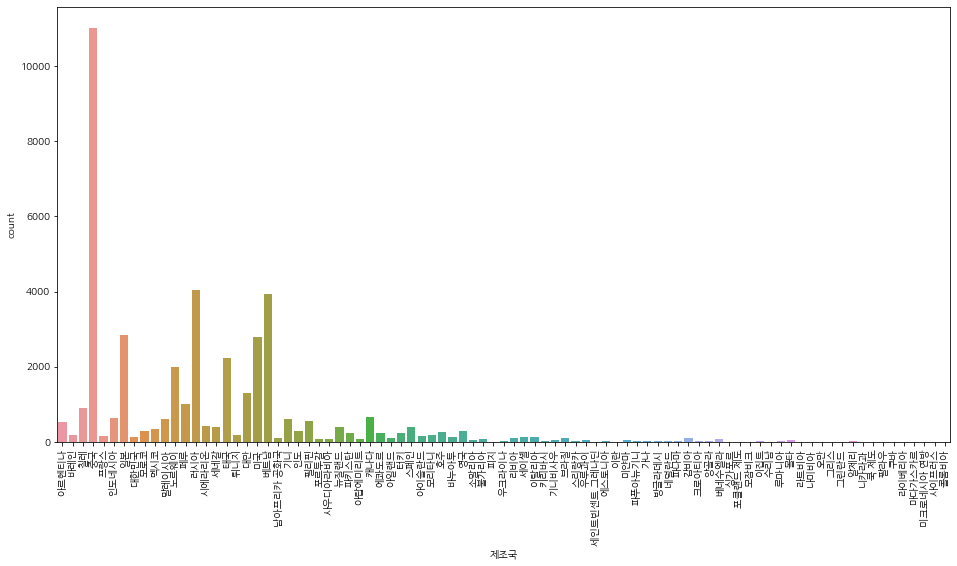

In [17]:
plt.figure(figsize = (16,8))
sns.countplot(train['제조국'])
plt.xticks(rotation = 90)

In [18]:
train['어종'].unique()

array(['새우', '게', '해삼', '서대 박대 페루다', '복어', '옥돔', '바지락', '가리비', '조개', '문어',
       '쭈꾸미', '멍게', '참치 새치류 ', '메로', '낙지', '가오리', '미역', '장어', '연어', '대구',
       '명란(명태알)', '호키류', '고동', '꽁치 학꽁치', '틸라피아(역돔)', '오징어', '가재 랍스타',
       '가자미', '홍어', '명태', '상어 고래', '민물붕어', '도미 감성돔 돔류', '꼬막', '재첩',
       '조개 백합 대합', '능성어 붉바리 바리', '준치', '우럭 볼락', '해파리', '홍합', '호키(새꼬리민태)알',
       '갈치', '밴댕이', '갑오징어', '성게알', '메기 동자개', '해초', '병어', '잉어',
       '조기 보구치 강다리', '농어', '아귀', '방어', '고등어', '민어 점성어', '미꾸라지', '부세',
       '줄비늘치', '개불', '조기 보구치 강다리 ', '골뱅이', '임연수', '해물모둠', '자라',
       '팡가시우스(홍메기)', '보리멸', '송어', '쥐치', '우렁 다슬기', '톳', '대구알',
       '붉평치(만다이 꽃돔)', '도다리', '날치알', '전복', '청어', '노래미', '꽁치 확꽁치', '멸치',
       '쏘가리', '참치 새치류', '고시래기', '달고기', '전갱기 매가리', '벤자리 알롱이', '가사리',
       '열빙어(시샤모)', '가물치', '청어알', '개복치', '양태', '열빙어(시샤모)알', '적어 눈볼대',
       '연어알', '전어', '전갱이 매가리', '남극빙어', '망둑어', '은민대구알', '삼치', '샛돔류알',
       '광어 넙치', '밀크피시', '다시마', '호끼류', '버터플라이 킹피쉬', '꼴뚜기', '어류 기타', '소라',
       '김', '양미리 정어리', '물메기(곰

In [19]:
print('어종이 연어인 것 중에 상세어종',train[train['어종'] == '연어']['상세어종'].unique())
print('어종이 오징어인 것 중에 상세어종',train[train['어종'] == '오징어']['상세어종'].unique())
print('어종이 새우인 것 중에 상세어종',train[train['어종'] == '새우']['상세어종'].unique())

어종이 연어인 것 중에 상세어종 ['대서양연어' '연어' '은연어' '곱사연어' '왕연어' '홍연어,Red salmon']
어종이 오징어인 것 중에 상세어종 ['오징어' '화살오징어']
어종이 새우인 것 중에 상세어종 ['아르헨티나붉은새우' '흰다리새우' '홍다리얼룩새우' '새우' '젓새우' '민물새우' '적새우' '북쪽분홍새우' '큰징거미새우'
 '도화새우' '닭새우' '새뱅이' '매미새우' '가시배새우']


우리가 사용할 데이터가 연어, 오징어, 흰다리새우 이지만 같은 어종에서 필요한 데이터가 있을지 생각해 봐야겠다.

In [20]:
train['기준일']

0       2015-12-28
1       2015-12-28
2       2015-12-28
3       2015-12-28
4       2015-12-28
           ...    
42068   2019-12-30
42069   2019-12-30
42070   2019-12-30
42071   2019-12-30
42072   2019-12-30
Name: 기준일, Length: 42073, dtype: datetime64[ns]

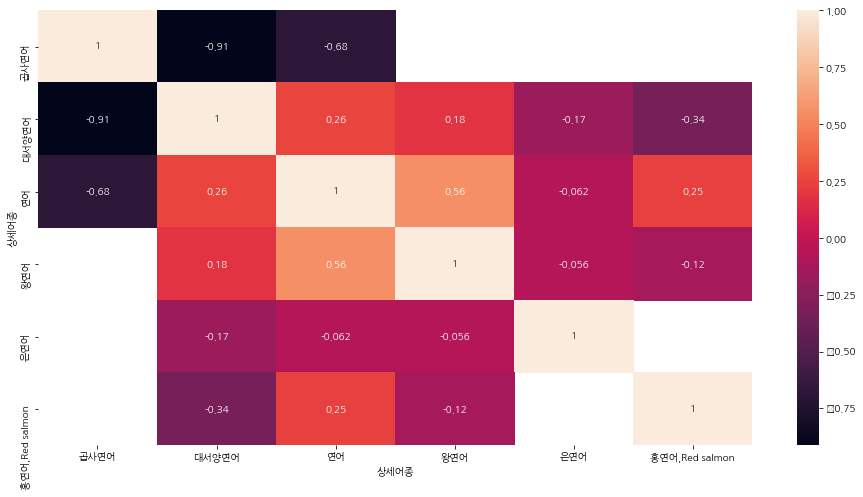

In [21]:
# 어종이 연어인 것중에 연어와의 상관성을 확인한다.
plt.figure(figsize = (16,8))
sns.heatmap(pd.pivot_table(train[train['어종'] == '연어'], index = '기준일', columns = '상세어종', values = 'target').corr(), annot = True)

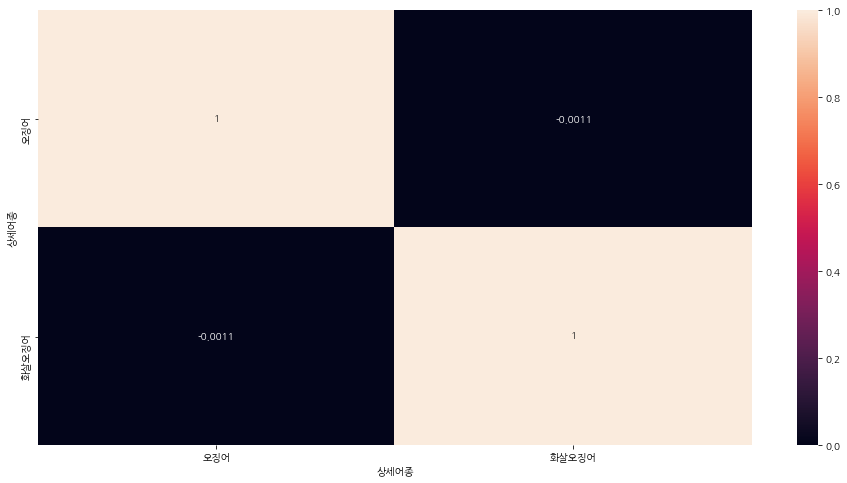

In [22]:
# 어종이 오징어인 것중에 오징어와의 상관성을 확인한다.
plt.figure(figsize = (16,8))
sns.heatmap(pd.pivot_table(train[train['어종'] == '오징어'], index = '기준일', columns = '상세어종', values = 'target').fillna(0).corr(), annot = True)

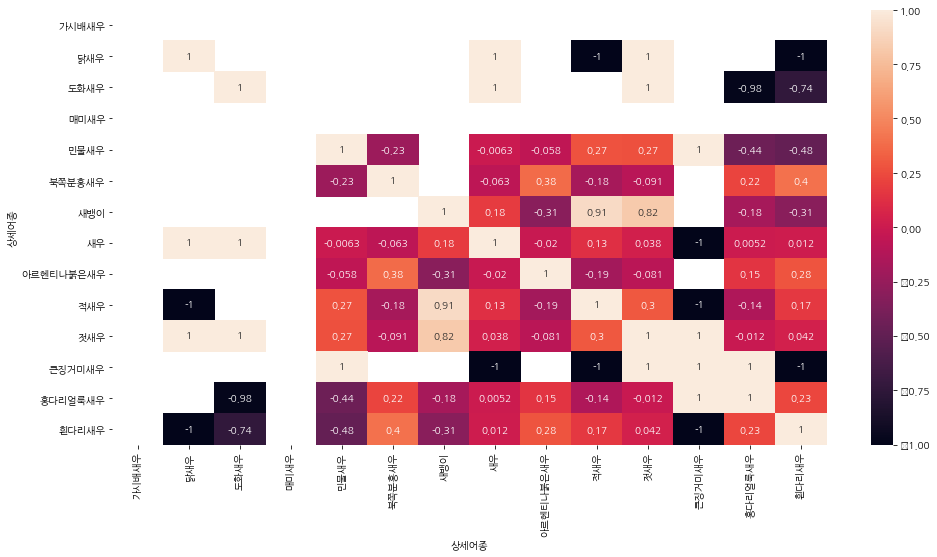

In [23]:
# 어종이 새우인 것중에 흰다리새우와의 상관성을 확인한다.
plt.figure(figsize = (16,8))
sns.heatmap(pd.pivot_table(train[train['어종'] == '새우'], index = '기준일', columns = '상세어종', values = 'target').corr(), annot = True)

어종으로 묶여있는 종을 가지고 분석을 진행할 수도 있지 않을까?

# 연어 EDA

In [24]:
train_연어 = train[train['상세어종'] == '연어']

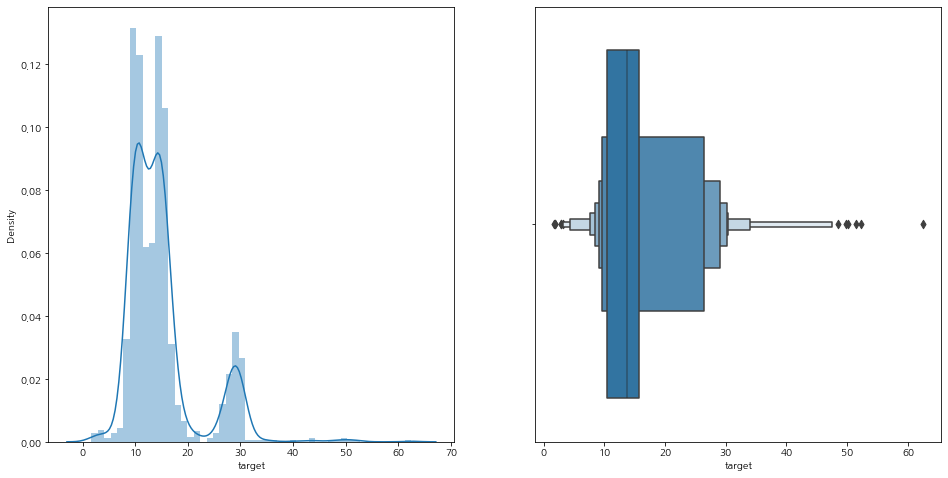

In [25]:
# 분포를 확인해 보자.
fig, ax = plt.subplots(ncols = 2, figsize=  (16,8))
sns.distplot(train_연어['target'], ax = ax[0])
sns.boxenplot(train_연어['target'], ax = ax[1])

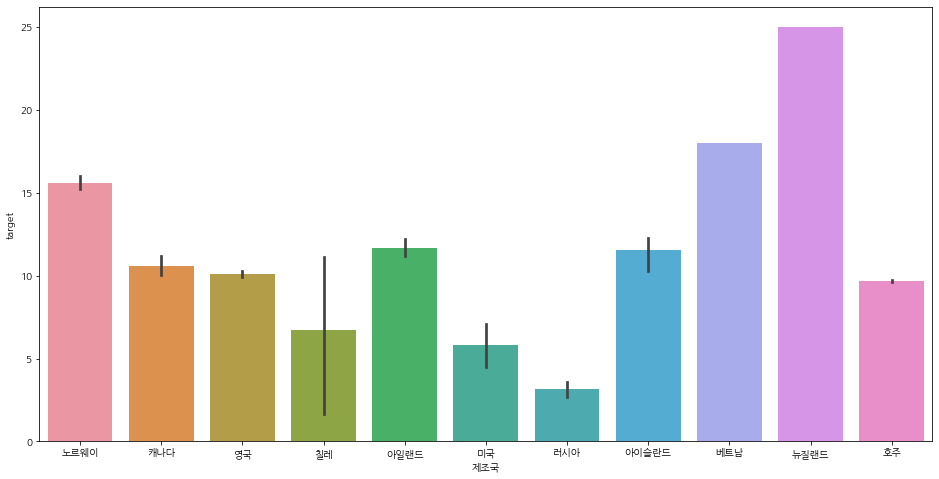

In [26]:
# 제조국별로 target변수가 얼마나 다른지 확인해 본다.
plt.figure(figsize = (16,8))
sns.barplot(data = train_연어, x = '제조국', y = 'target')

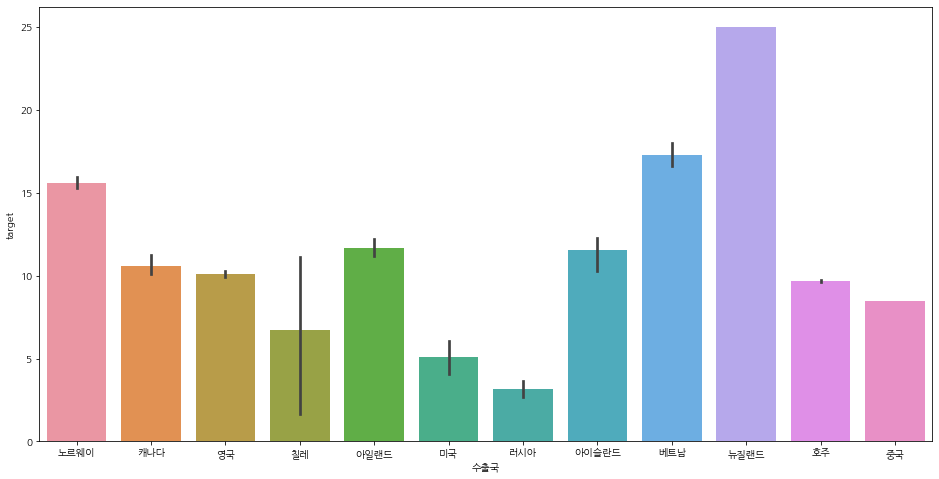

In [27]:
# 수출국 별로 target변수가 얼마나 다른지 확인해 본다.
# 중국은 수입만 했다.
plt.figure(figsize = (16,8))
sns.barplot(data = train_연어, x = '수출국', y = 'target')

In [28]:
print(train_연어['제조국'].unique())
print(train_연어['수출국'].unique())

['노르웨이' '캐나다' '영국' '칠레' '아일랜드' '미국' '러시아' '아이슬란드' '베트남' '뉴질랜드' '호주']
['노르웨이' '캐나다' '영국' '칠레' '아일랜드' '미국' '러시아' '아이슬란드' '베트남' '뉴질랜드' '호주' '중국']


In [29]:
# 어떻게 처리해 줄지 얘기해보자.
train_연어[train_연어['수출국'] == '중국']

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target,month,year,day,difference
30905,2018-12-10,수산물,미국,중국,판매용,어류,연어,연어,"냉동,필렛(F)",8.46788,12,2018,10,1


In [30]:
train.columns

Index(['기준일', '제품구분', '제조국', '수출국', '수입용도', '중분류명 카테고리', '어종', '상세어종', '수입형태',
       'target', 'month', 'year', 'day', 'difference'],
      dtype='object')

Text(0.5, 1.0, '수입용도의 count')

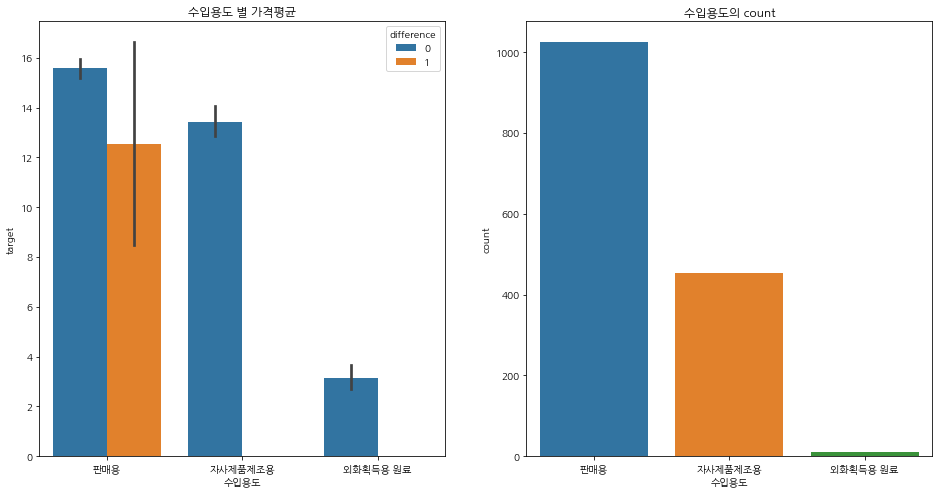

In [31]:
# 수입용도에 따라서 값의 차이가 얼마나 있는지 확인해보자.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = train_연어, x = '수입용도', y = 'target', hue = 'difference', ax = ax[0])
ax[0].set_title('수입용도 별 가격평균')

sns.countplot(train_연어['수입용도'], ax = ax[1])
ax[1].set_title('수입용도의 count')

# 판매용 이외에는 나라의 수출한 품목이 없다.
# 판매용이 가장 많고 자사제품제조용, 외화획득용 원료
# 그러면 외화 획득용 원료의 상태는 어떤게 있을까?

In [32]:
# 연어의 외화획득용 원료는 러시아에서만 사용하고 있다.
# 그러면 여기서 궁금한 점은 외화획득용 원료라서 싼것인가? 아니면 러시아라서 싼것인가?
train_연어[train_연어['수입용도'] == '외화획득용 원료']

# 위의 그래프를 살펴보면외화획득용 원료라서 싼 것이 아니라 러시아라서 싼 것으로 보인다.

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target,month,year,day,difference
8750,2016-11-07,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,2.884304,11,2016,7,0
10135,2016-12-26,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,4.002672,12,2016,26,0
18366,2017-10-16,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,4.633319,10,2017,16,0
30767,2018-12-03,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,3.259972,12,2018,3,0
32701,2019-02-11,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,1.900000,2,2019,11,0
32954,2019-02-18,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,2.887444,2,2019,18,0
33205,2019-03-04,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,3.399994,3,2019,4,0
33415,2019-03-11,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,3.420130,3,2019,11,0
33968,2019-03-25,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,3.259907,3,2019,25,0
35188,2019-05-06,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,1.866149,5,2019,6,0


In [33]:
# 러시아라서 수입가격이 싼게 아닌가 생각된다.
train_연어[train_연어['제조국'] == '러시아']

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target,month,year,day,difference
8750,2016-11-07,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,2.884304,11,2016,7,0
10135,2016-12-26,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,4.002672,12,2016,26,0
18366,2017-10-16,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,4.633319,10,2017,16,0
18585,2017-10-23,수산물,러시아,러시아,판매용,어류,연어,연어,"냉동,곤이",3.200000,10,2017,23,0
30767,2018-12-03,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,3.259972,12,2018,3,0
32701,2019-02-11,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,1.900000,2,2019,11,0
32954,2019-02-18,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,2.887444,2,2019,18,0
33205,2019-03-04,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,3.399994,3,2019,4,0
33415,2019-03-11,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,3.420130,3,2019,11,0
33968,2019-03-25,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,3.259907,3,2019,25,0


Text(0.5, 1.0, '연별 count')

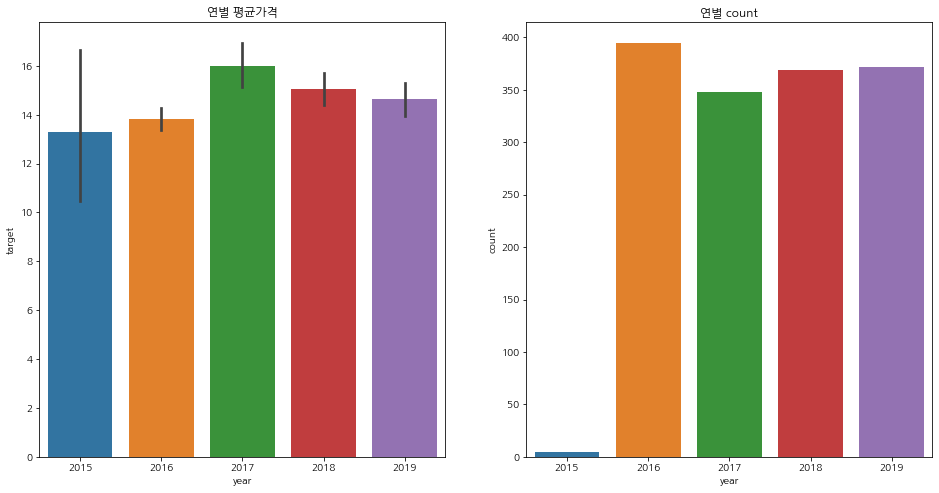

In [34]:
# 년별로 비교해보자.
# 2015년은 12월 28일부터 있으므로 제외한다.
# 가격은 내려가는 추세이지만 소비량은 늘고 있다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = train_연어, x = 'year', y = 'target', ax = ax[0])
sns.countplot(train_연어['year'], ax = ax[1])
ax[0].set_title('연별 평균가격')
ax[1].set_title('연별 count')

Text(0.5, 1.0, 'month별 count')

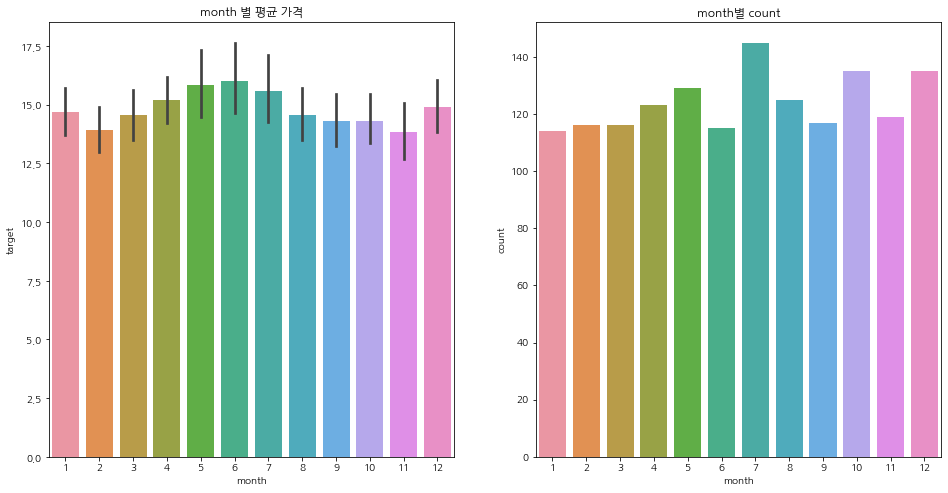

In [35]:
# 월 별로 비교해보자.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = train_연어, x = 'month', y = 'target', ax = ax[0])
sns.countplot(train_연어['month'], ax = ax[1])
ax[0].set_title('month 별 평균 가격')
ax[1].set_title('month별 count')

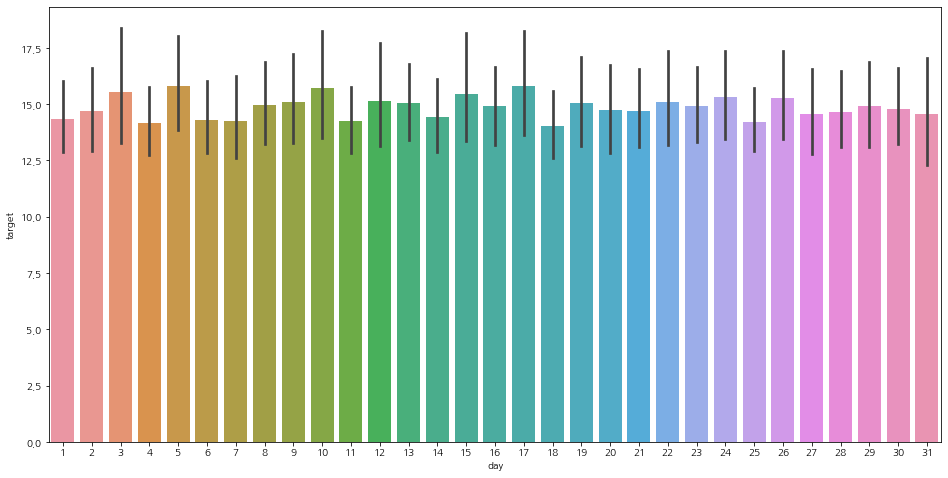

In [36]:
# 일별로 비교해보자.
plt.figure(figsize = (16,8))
sns.barplot(data = train_연어, x = 'day', y = 'target')

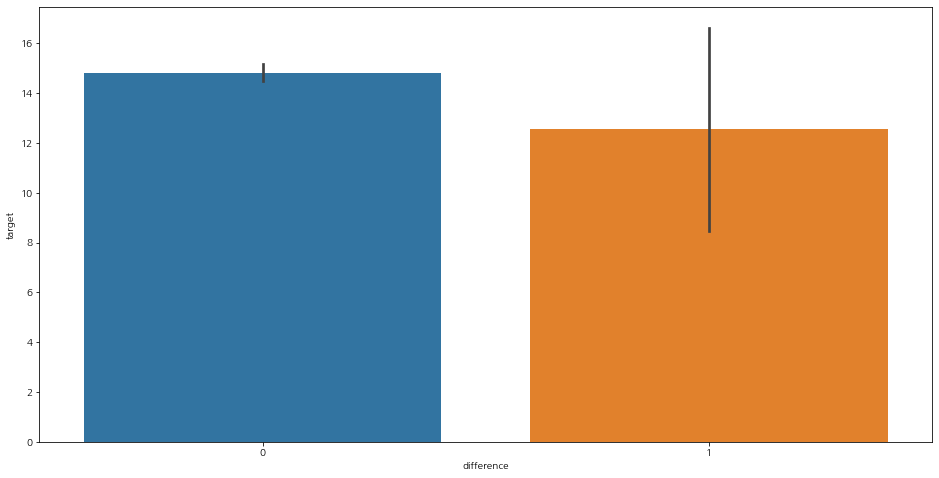

In [37]:
# 수출국과 수입국이 다를때 차이가 있을지 확인해 보자.
plt.figure(figsize =(16,8))
sns.barplot(data = train_연어, x = 'difference', y = 'target')

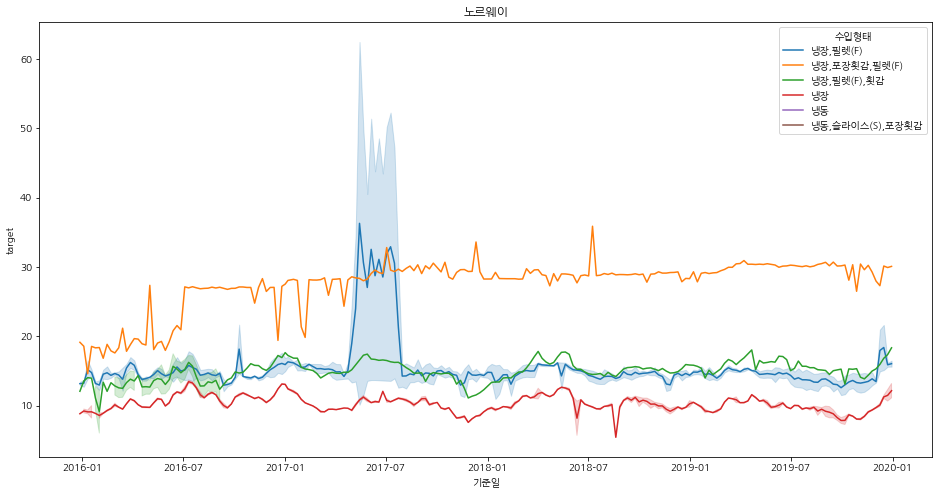

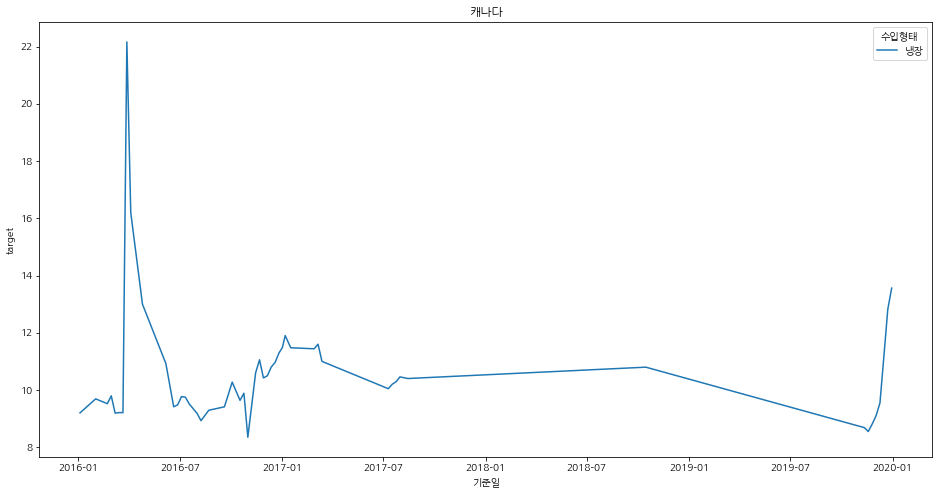

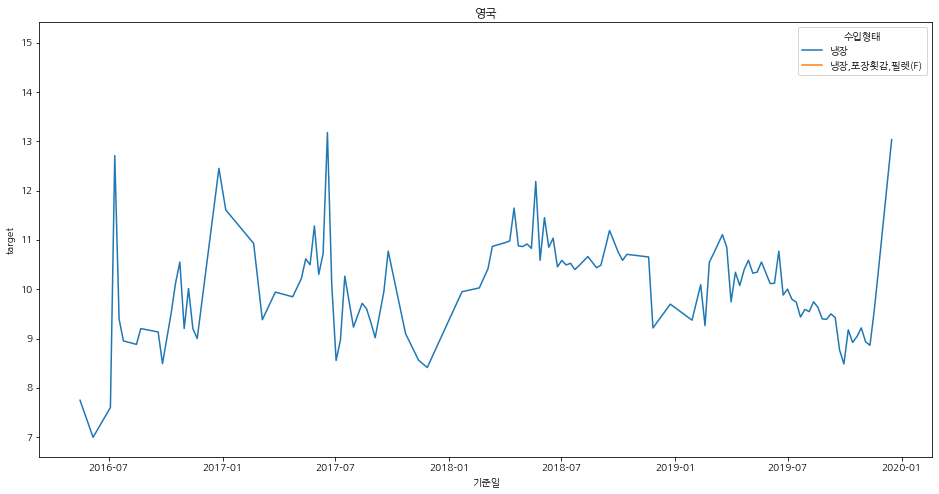

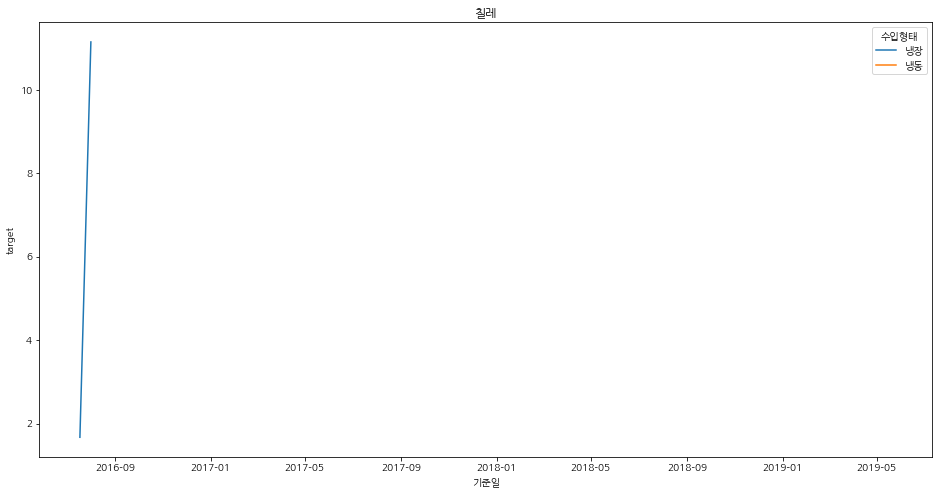

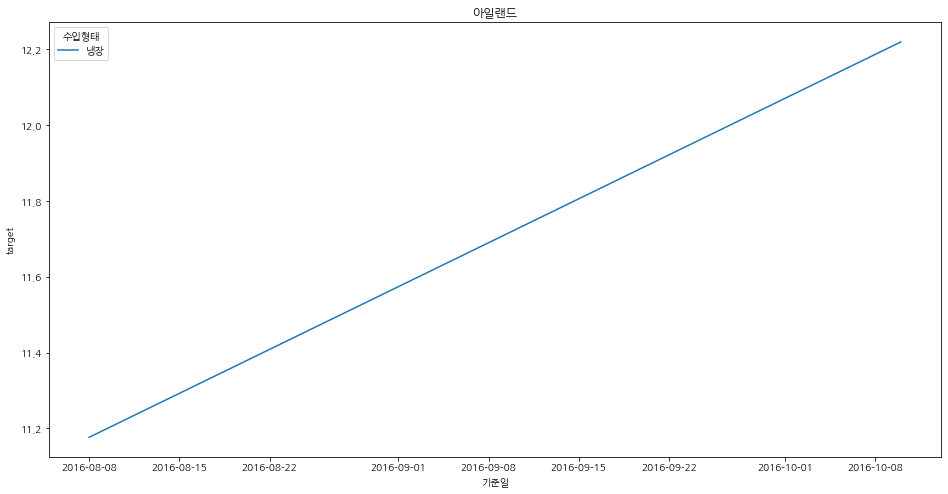

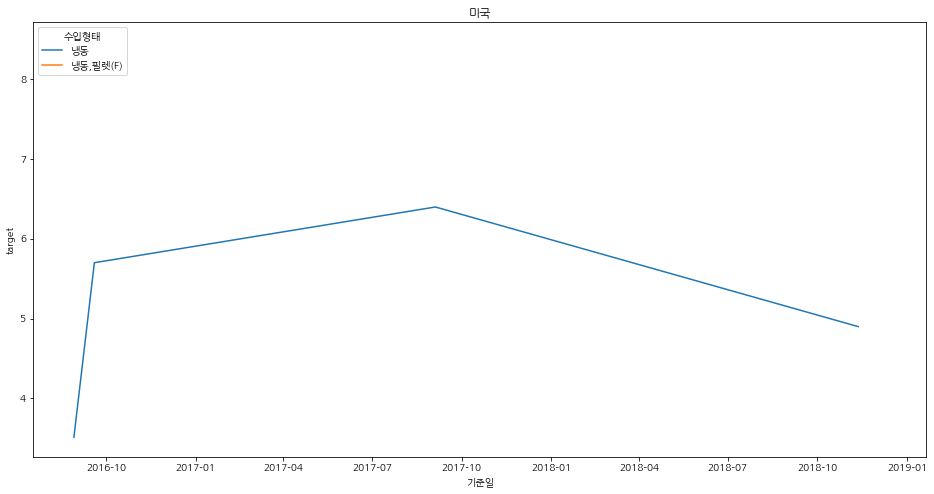

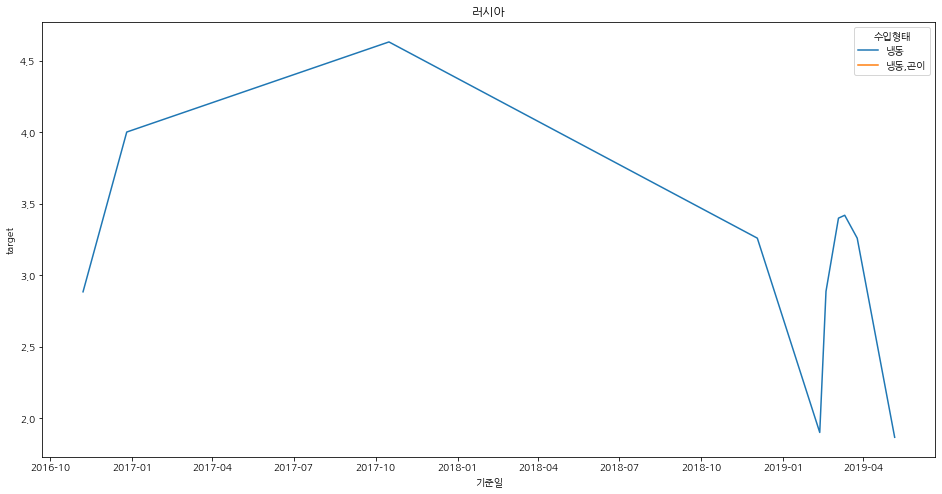

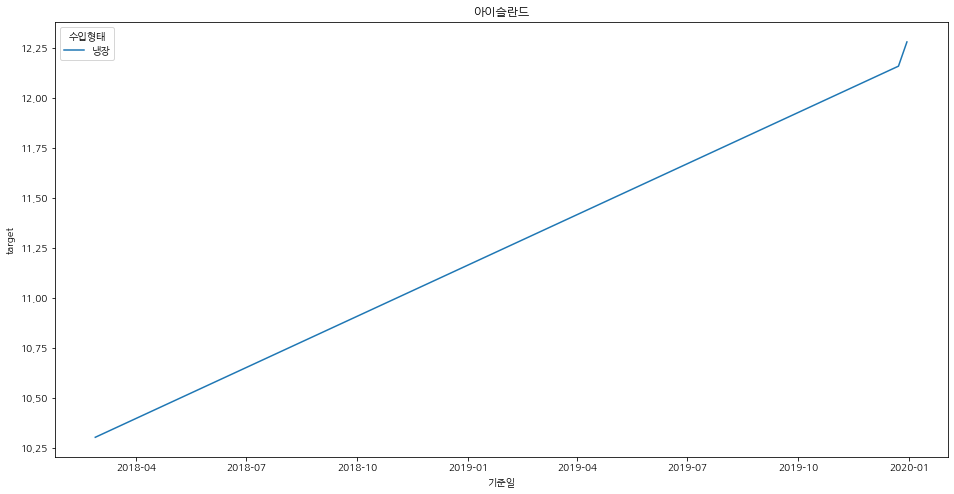

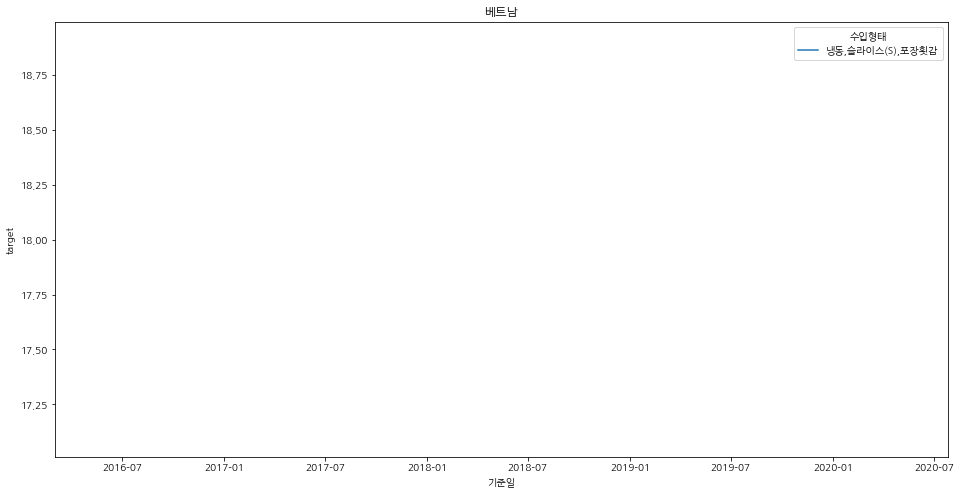

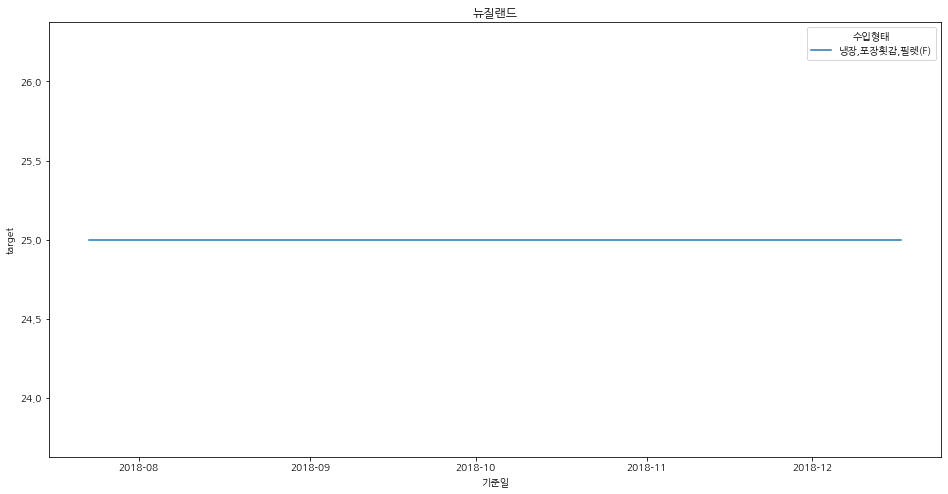

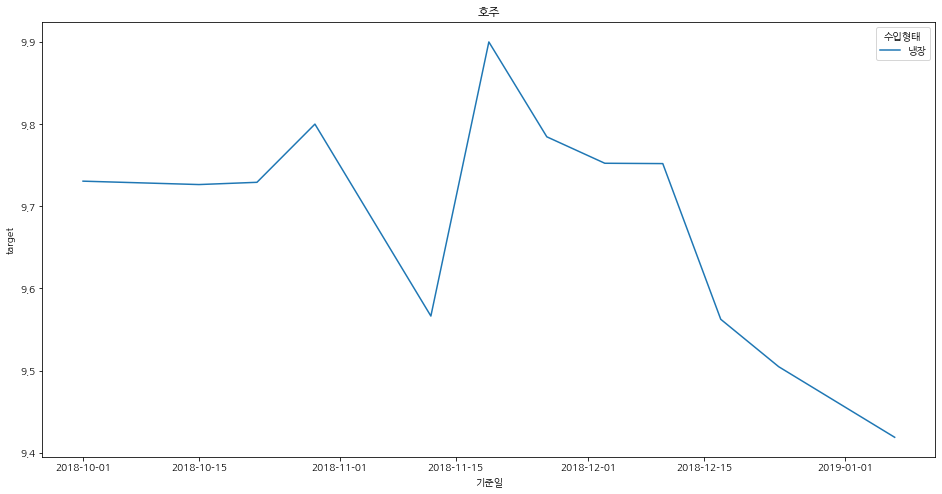

In [38]:
# 그래프를 확인해 보면 각 구간마다 차이가 있겠지만 수출을 한 시기는 정해져 있는 것 같다.
# 그러면 수출을 한 시기는 언제인지 알아보자.
for i in train_연어['제조국'].unique():
  plt.figure(figsize =(16,8))
  sns.lineplot(data = train_연어[train_연어['제조국'] == i], x = '기준일', y = 'target', hue = '수입형태')
  plt.title(f'{i}')

In [39]:
# 제조국과 수출국이 다른 부분을 확인해 보자.
train_연어[train_연어['difference'] == 1]

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target,month,year,day,difference
29810,2018-11-05,수산물,노르웨이,베트남,판매용,어류,연어,연어,"냉동,슬라이스(S),포장횟감",16.63513,11,2018,5,1
30905,2018-12-10,수산물,미국,중국,판매용,어류,연어,연어,"냉동,필렛(F)",8.46788,12,2018,10,1


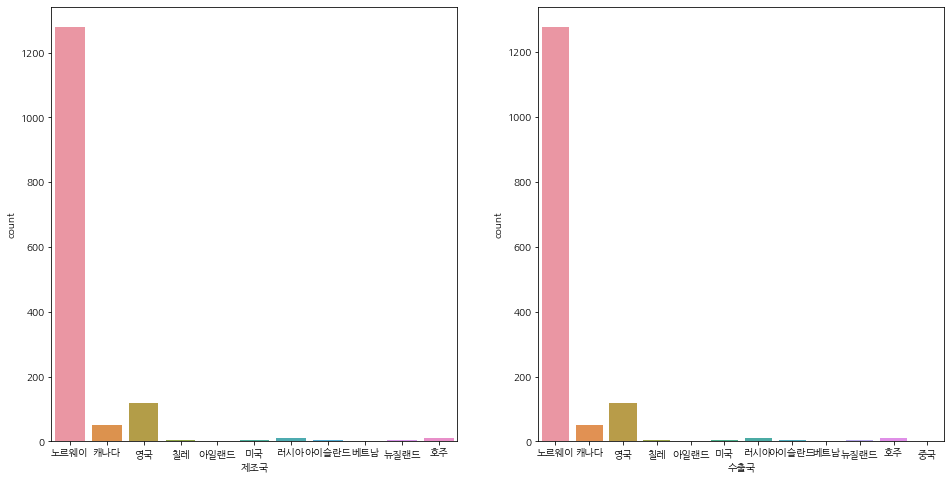

In [40]:
# 연어의 경우 1: 노르웨이, 2: 영국, 3: 캐나다 순으로 어획량이 많다.
# 2건 빼고 자신의 국가에서 소비를 하므로 데이터의 분포가 비슷하게 나타난다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.countplot(train_연어['제조국'], ax = ax[0])
sns.countplot(train_연어['수출국'], ax = ax[1])

Text(0.5, 1.0, '수입형태의 count')

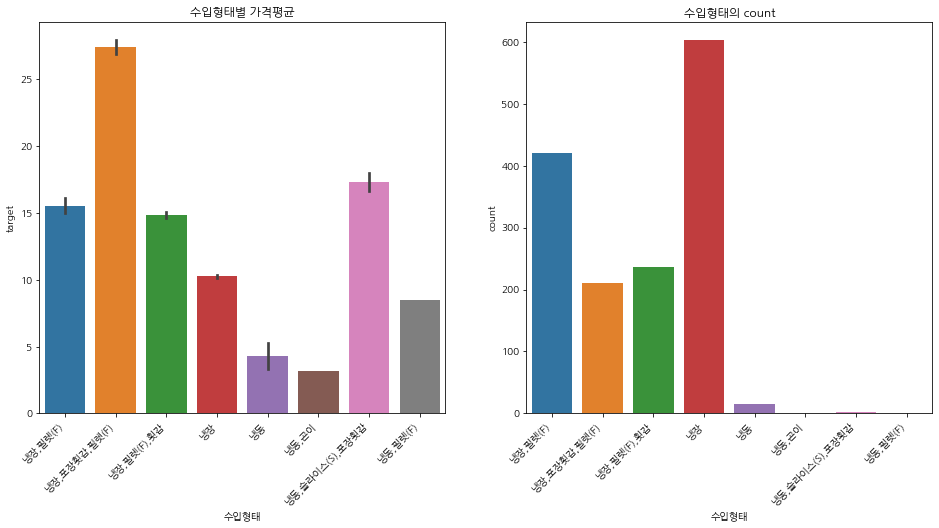

In [41]:
# 수입형태에 따라서는 어떻게 다른지 확인해 보자.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = train_연어, x = '수입형태', y = 'target', ax = ax[0])
sns.countplot(train_연어['수입형태'], ax = ax[1])
fig.autofmt_xdate(rotation=45)
ax[0].set_title('수입형태별 가격평균')
ax[1].set_title('수입형태의 count')

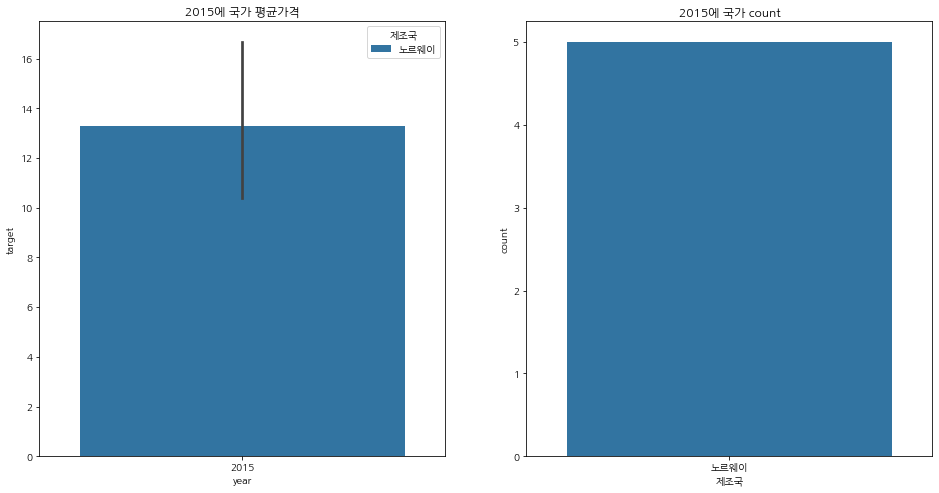

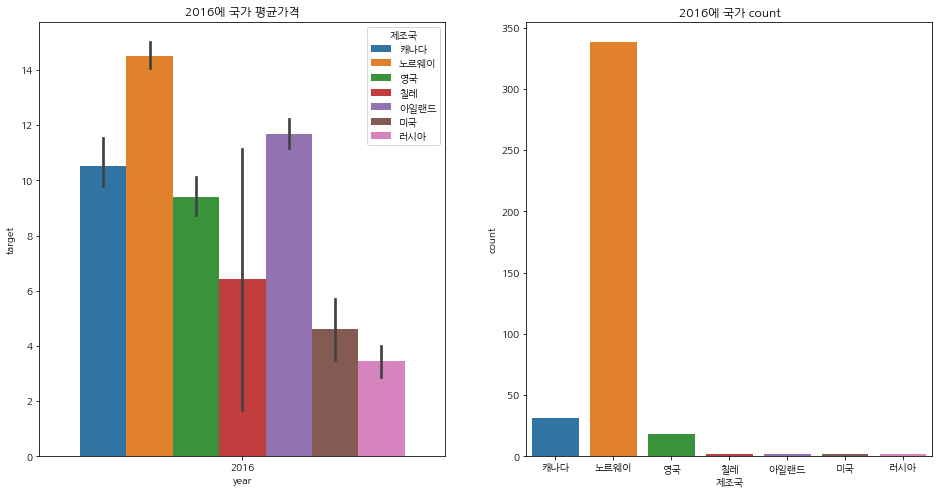

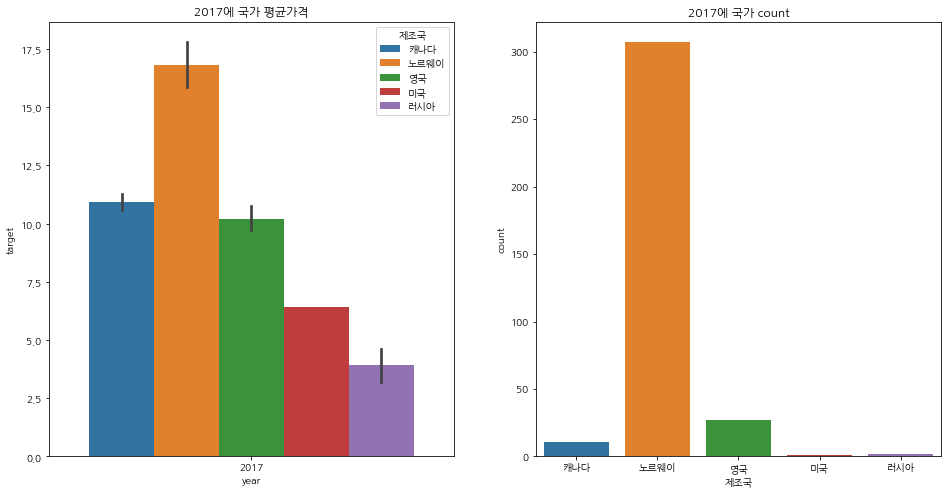

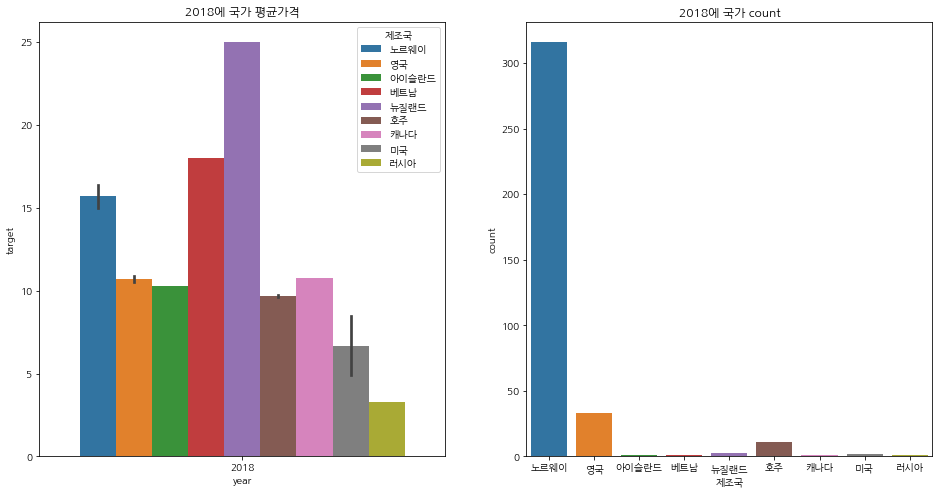

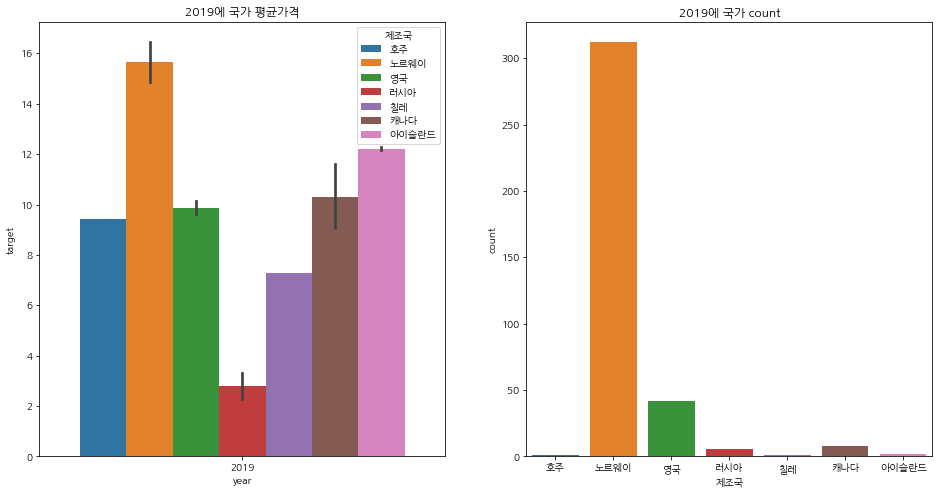

In [42]:
# 각 년도마다 국가별로 바뀐게 있는지 확인한다.
for i in train_연어['year'].unique():  
  fig, ax = plt.subplots(ncols = 2, figsize =(16,8))
  sns.barplot(data = train_연어[train_연어['year'] == i], x = 'year', y = 'target', hue = '제조국', ax = ax[0])
  sns.countplot(train_연어[train_연어['year'] == i]['제조국'], ax = ax[1])
  ax[0].set_title(f'{i}에 국가 평균가격')
  ax[1].set_title(f'{i}에 국가 count')

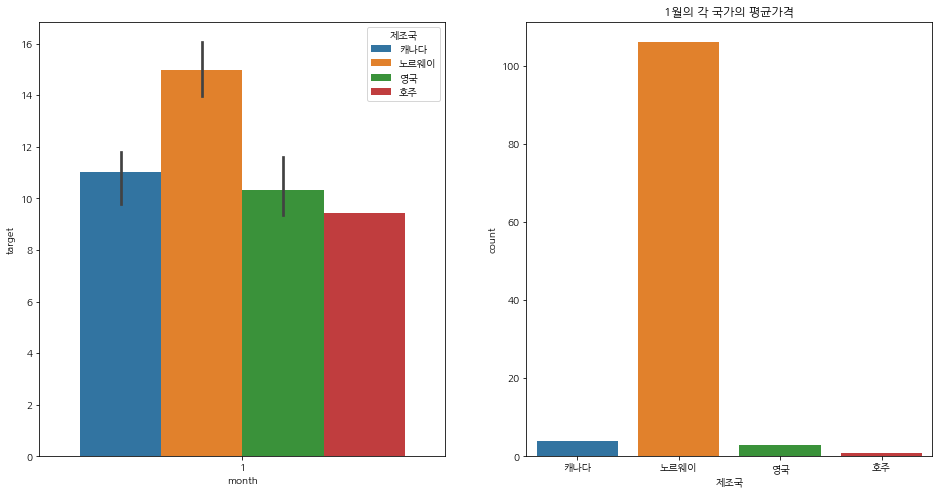

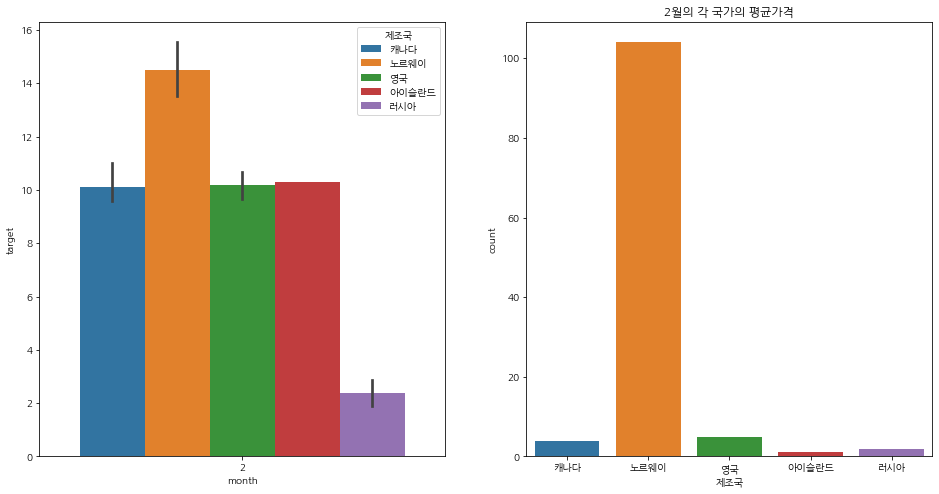

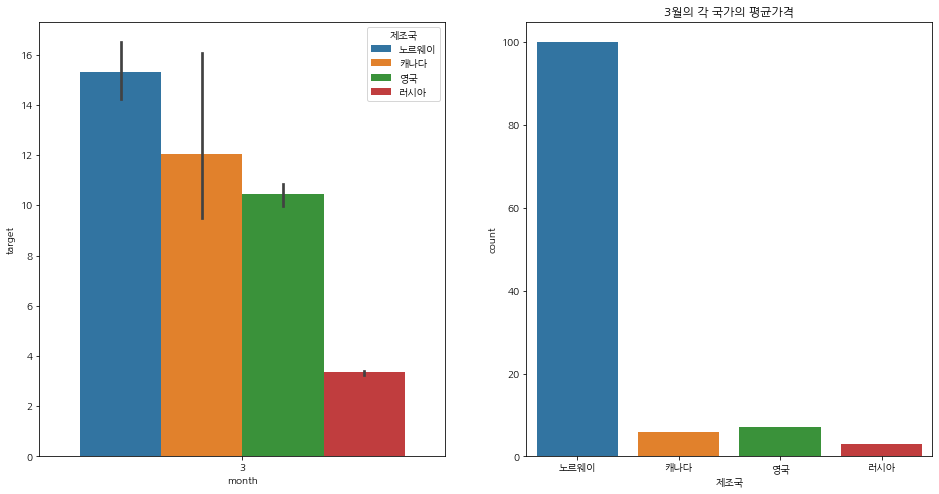

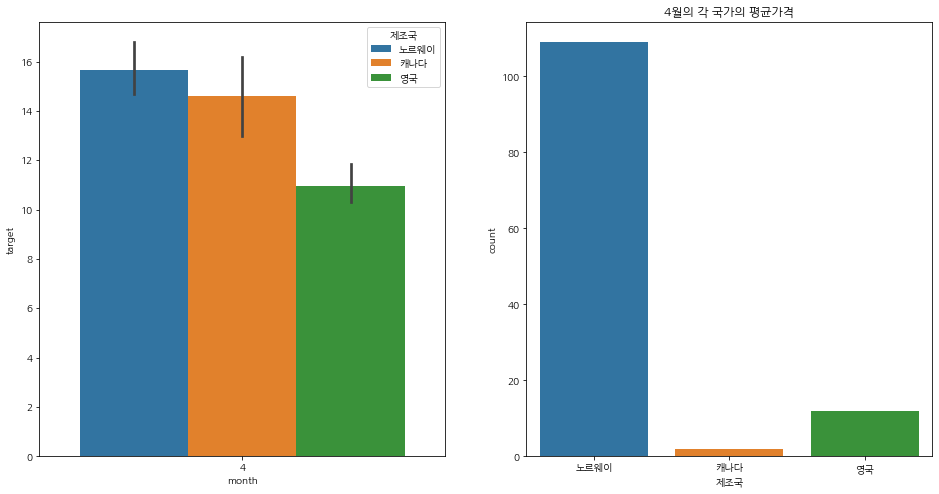

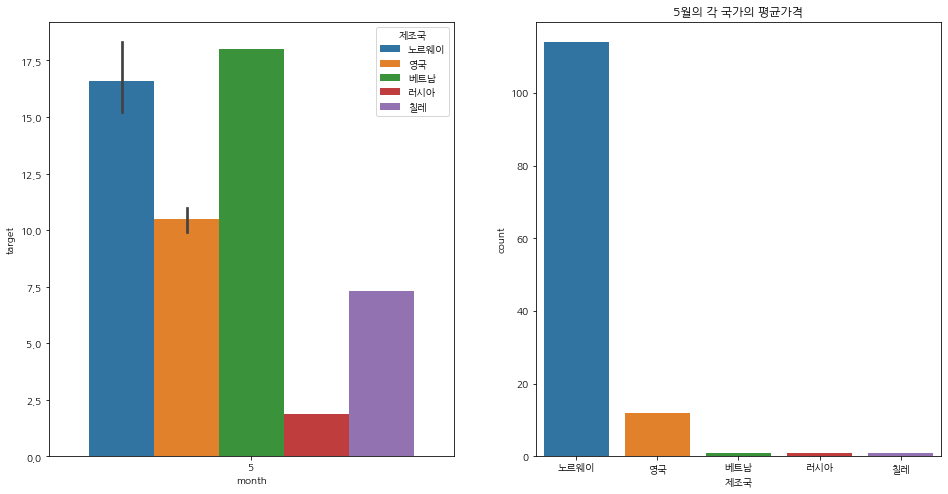

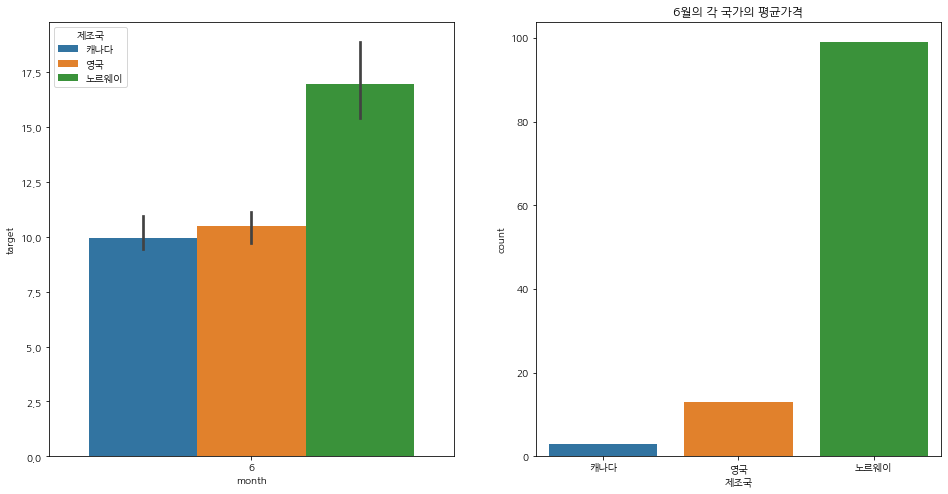

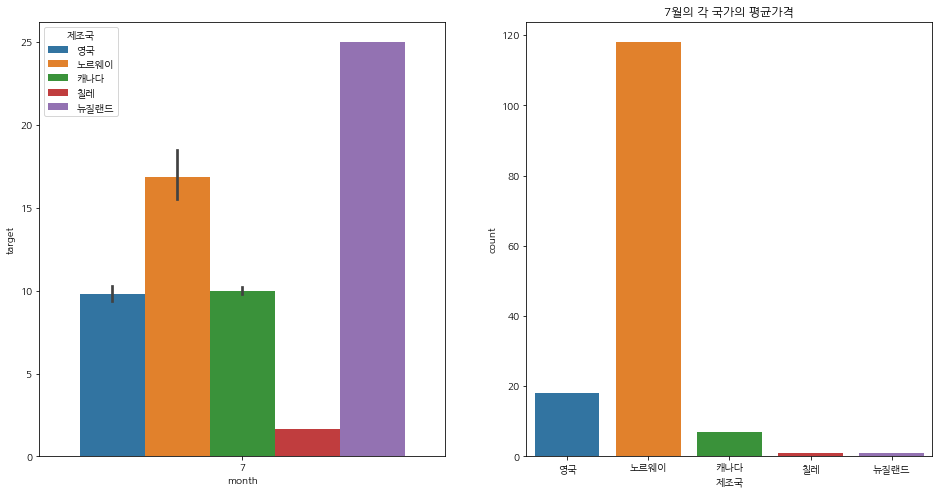

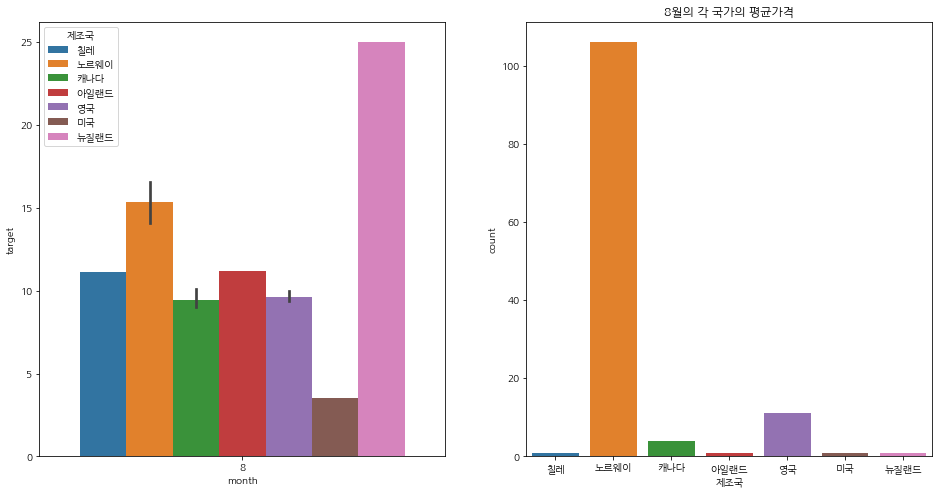

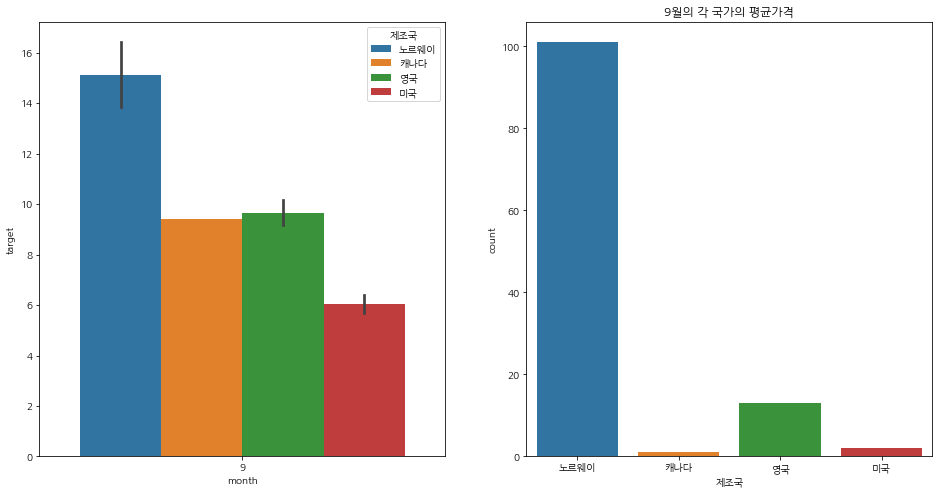

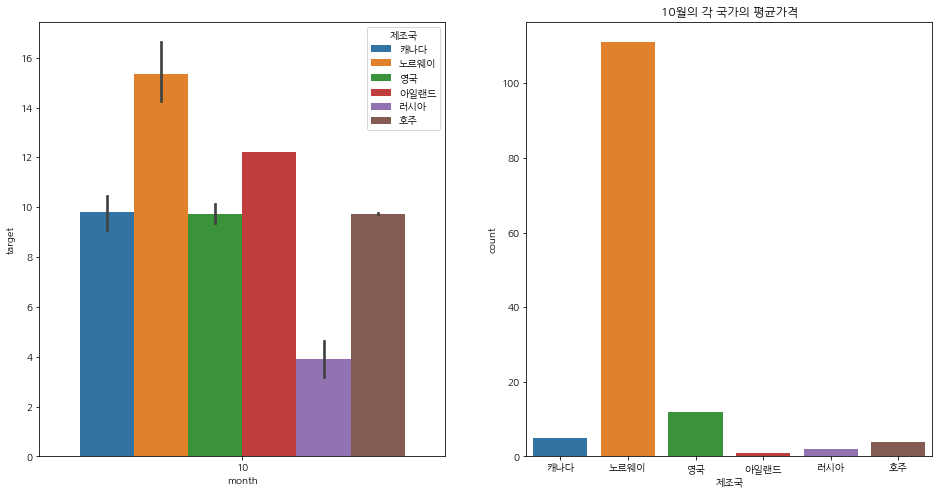

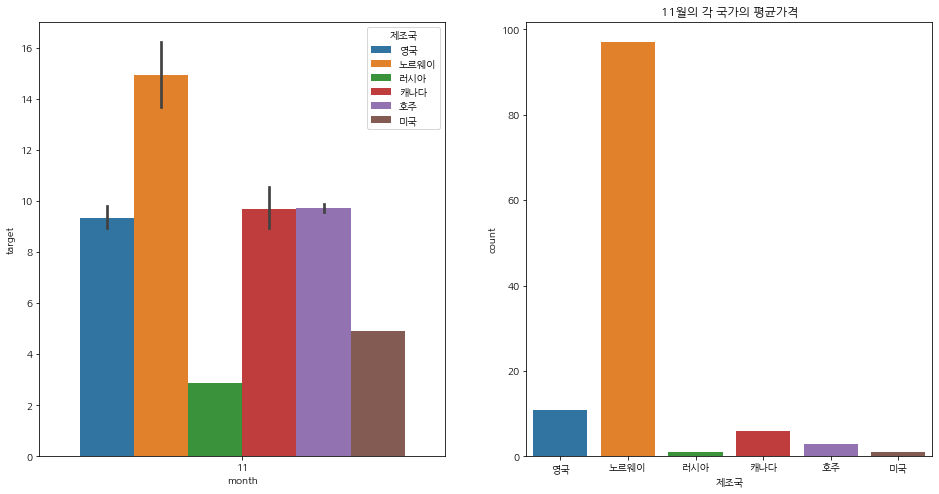

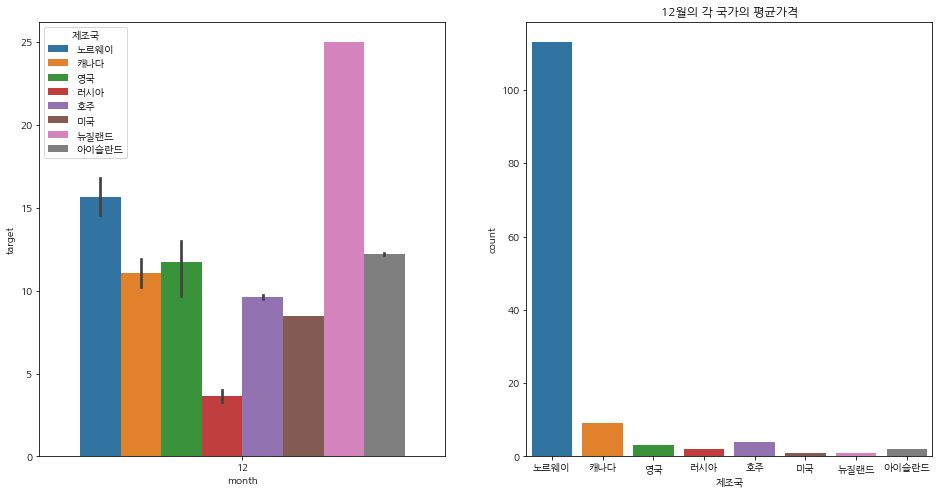

In [43]:
# month별로 차이가 있을까?
for i in sorted(train_연어['month'].unique()):
  fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
  sns.barplot(data = train_연어[train_연어['month'] == i], x = 'month', y = 'target', hue = '제조국', ax = ax[0])
  sns.countplot(train_연어[train_연어['month'] == i]['제조국'])
  plt.title(f'{i}월의 각 국가의 평균가격')

In [44]:
# 뉴질랜드를 확인해 봤을 때 가격이 25.0으로 고정되어 있는 것을 확인할 수 있다.
train_연어[train_연어['제조국'] == '뉴질랜드']

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target,month,year,day,difference
26846,2018-07-23,수산물,뉴질랜드,뉴질랜드,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",25.0,7,2018,23,0
27413,2018-08-13,수산물,뉴질랜드,뉴질랜드,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",25.0,8,2018,13,0
31110,2018-12-17,수산물,뉴질랜드,뉴질랜드,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",25.0,12,2018,17,0


# 연어 모델링

In [45]:
train_연어.head()

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target,month,year,day,difference
74,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",12.936815,12,2015,28,0
129,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",19.146755,12,2015,28,0
168,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F),횟감",12.082384,12,2015,28,0
174,2015-12-28,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",13.425826,12,2015,28,0
198,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,냉장,8.844281,12,2015,28,0


In [46]:
train_연어['중분류명 카테고리'].unique()

array(['어류'], dtype=object)

In [50]:
# 데이터를 test와 똑같이 만들어 주자.
train = train_연어.groupby('기준일')['target'].mean().reset_index()

In [51]:
train

,기준일,target
0,2015-12-28,13.287212
1,2016-01-04,12.331994
2,2016-01-11,12.876513
3,2016-01-18,13.387350
4,2016-01-25,12.644323
...,...,...
205,2019-12-02,14.114510
206,2019-12-09,15.565930
207,2019-12-16,16.314381
208,2019-12-23,15.883609


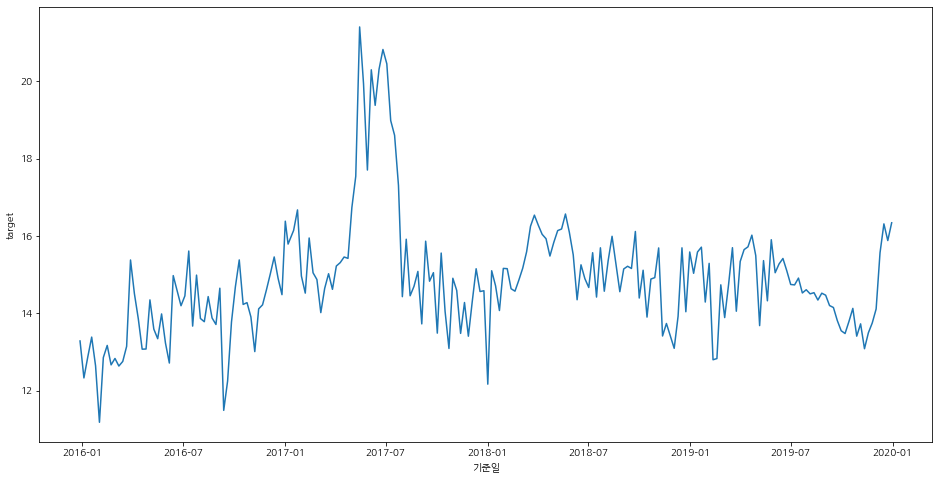

In [52]:
# 각 뛰는지점이 있는 것을 확인할 수 있다.
plt.figure(figsize = (16,8))
sns.lineplot(data = train, x = '기준일', y = 'target')

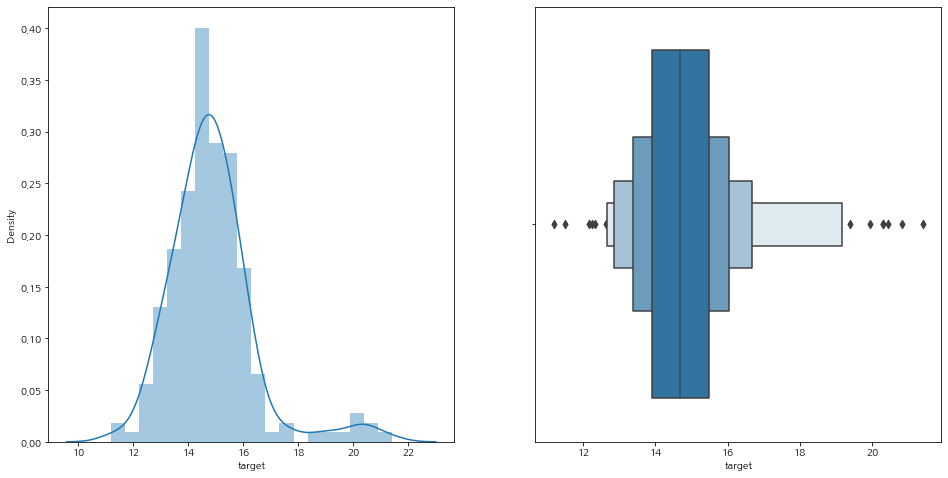

In [53]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(train['target'], ax = ax[0])
sns.boxenplot(train['target'], ax = ax[1])

In [54]:
# year, month, day 만들어 주기
train['year'] = train['기준일'].dt.year
train['month'] = train['기준일'].dt.month
train['day'] = train['기준일'].dt.day

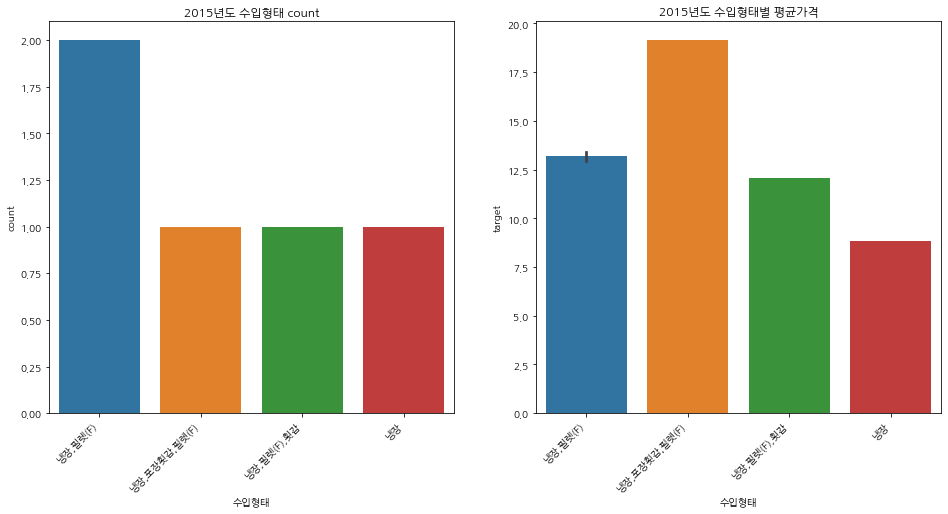

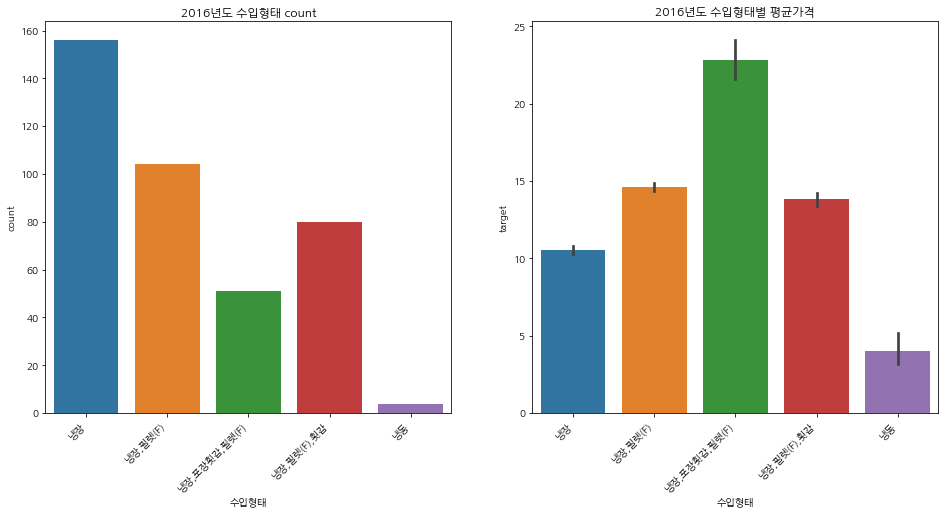

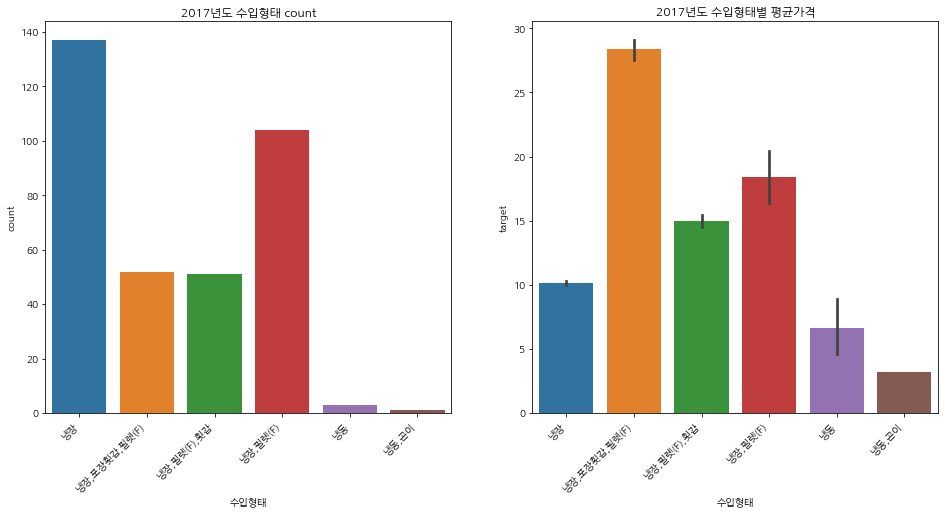

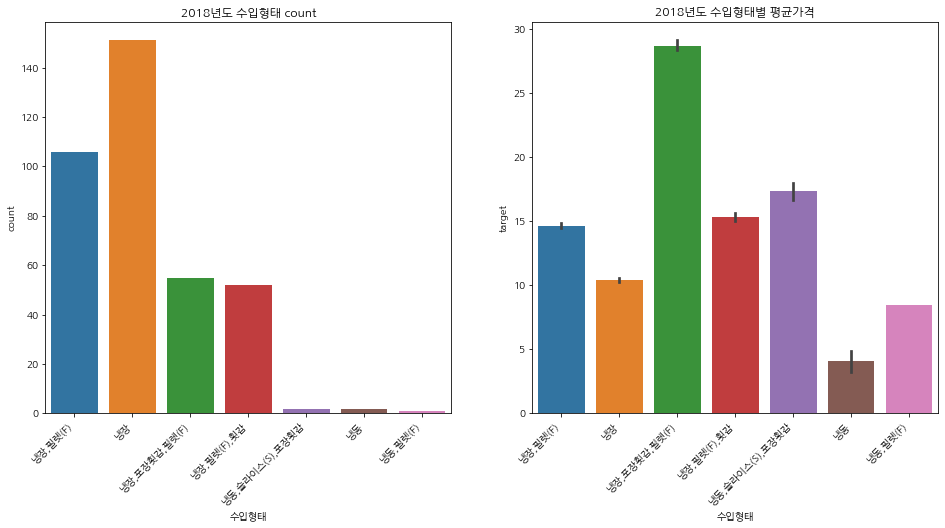

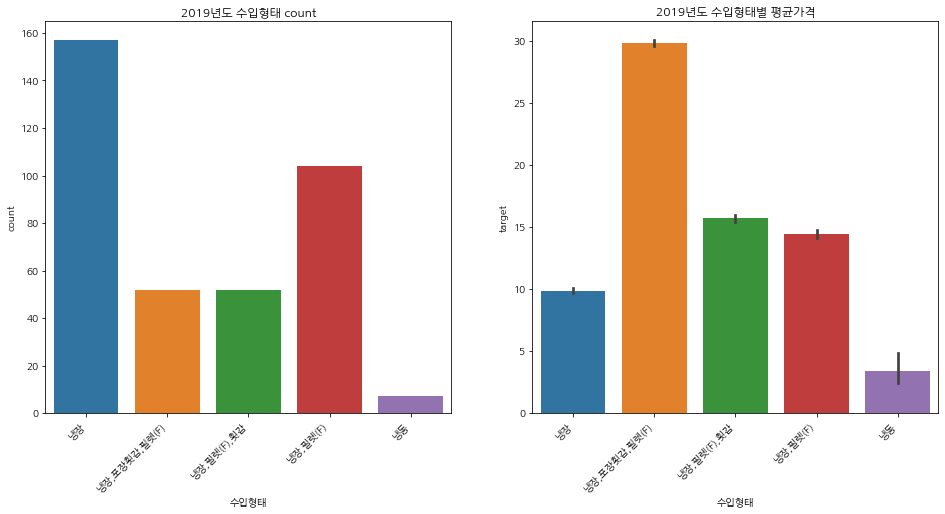

In [55]:
# 년도별 수입형태가 어떻게 변화하였는가?
for i in train_연어['year'].unique():
  fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
  sns.countplot(train_연어[train_연어['year'] == i]['수입형태'], ax = ax[0])
  sns.barplot(data = train_연어[train_연어['year'] == i], x = '수입형태', y = 'target', ax = ax[1])
  fig.autofmt_xdate(rotation=45)
  ax[0].set_title(f'{i}년도 수입형태 count')
  ax[1].set_title(f'{i}년도 수입형태별 평균가격')

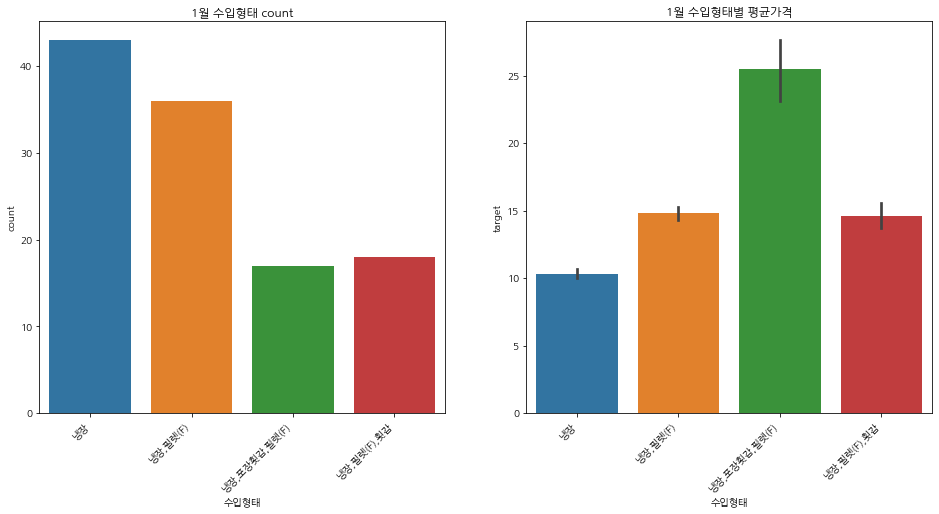

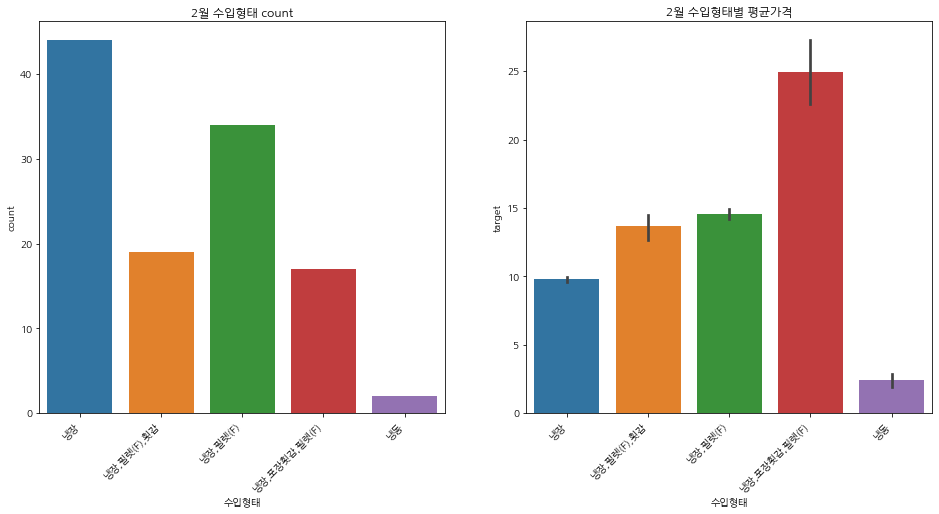

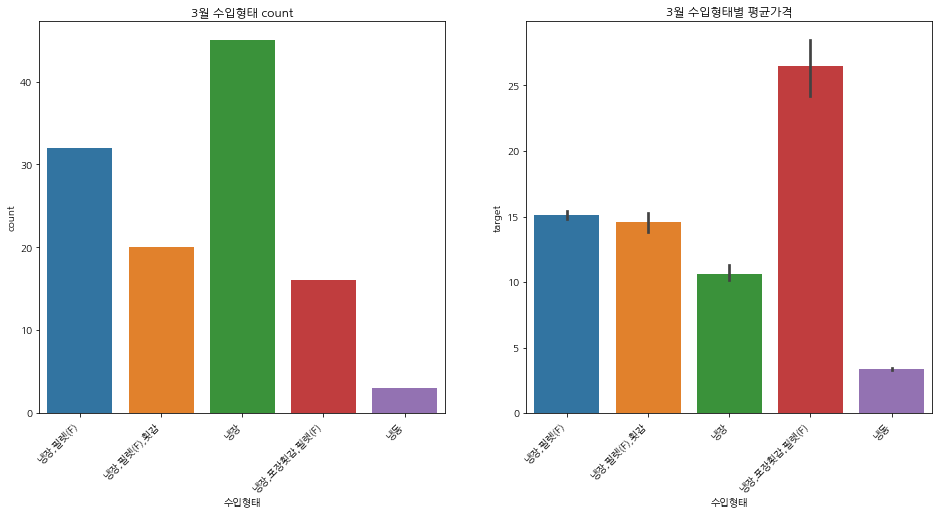

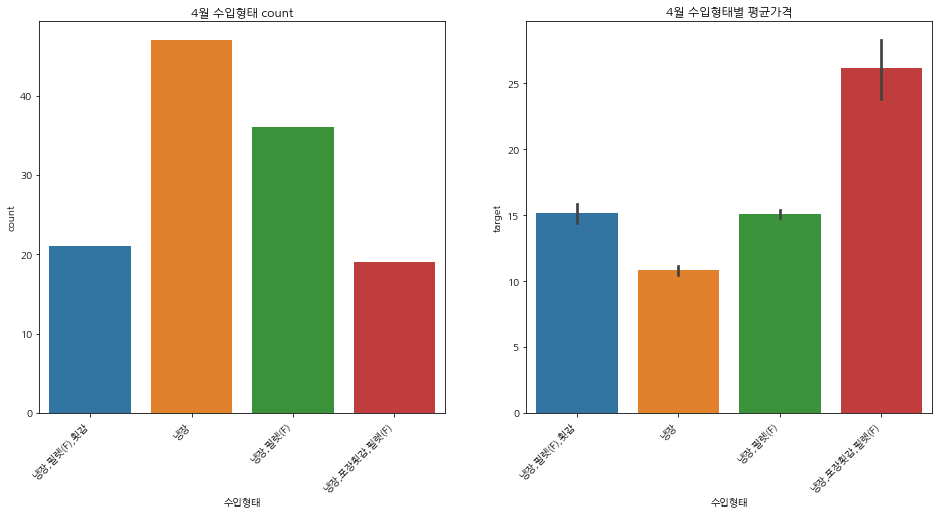

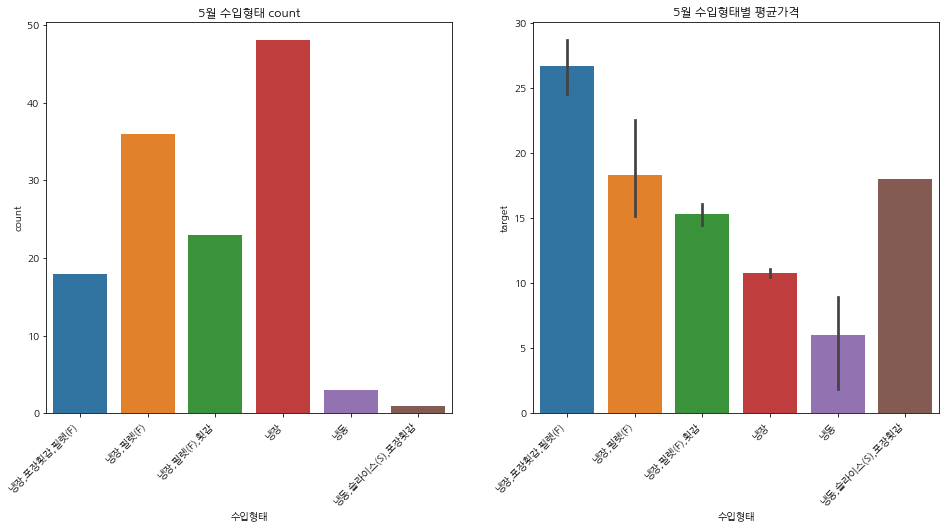

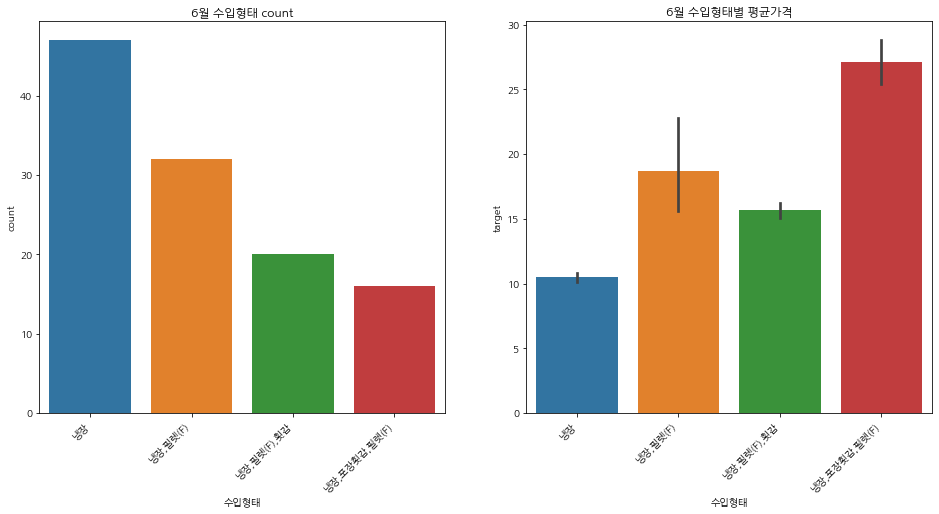

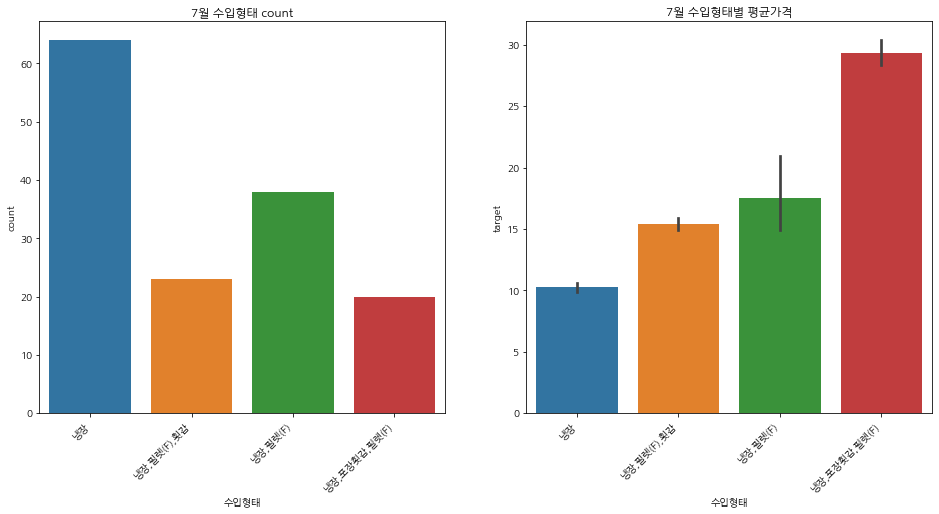

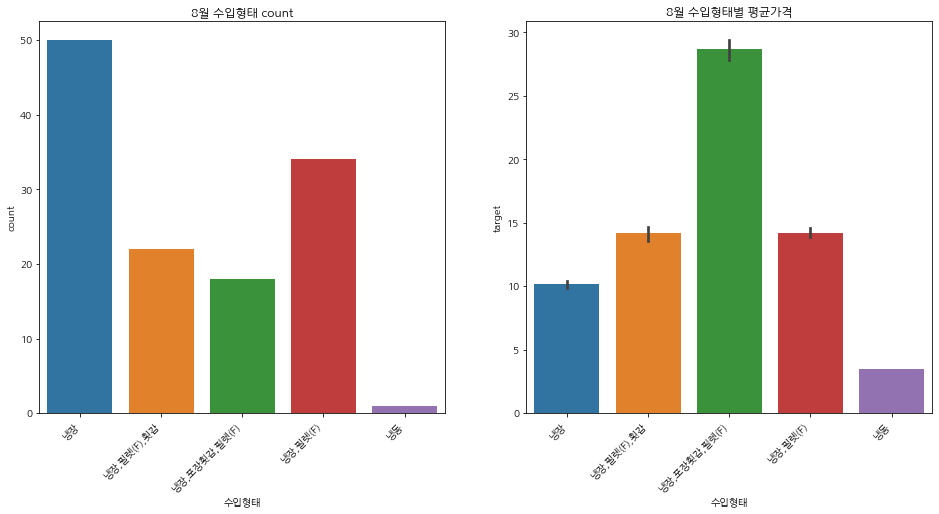

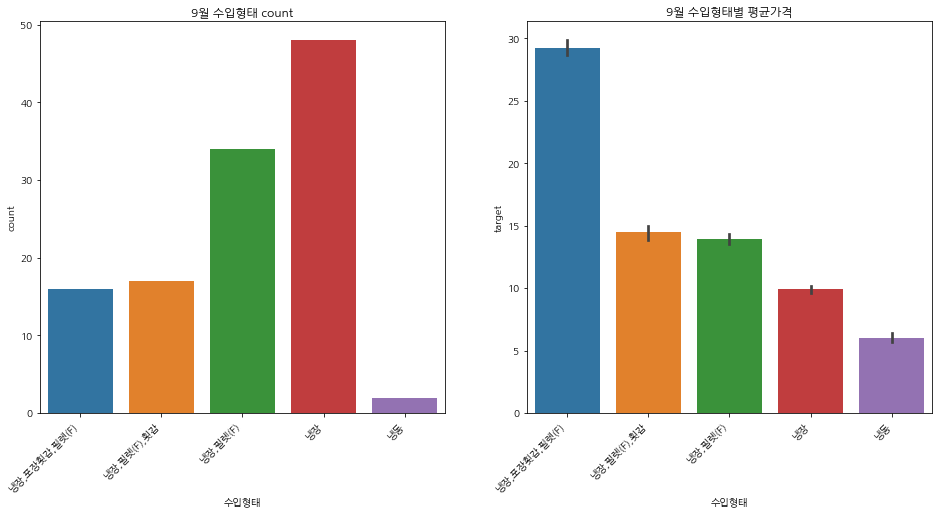

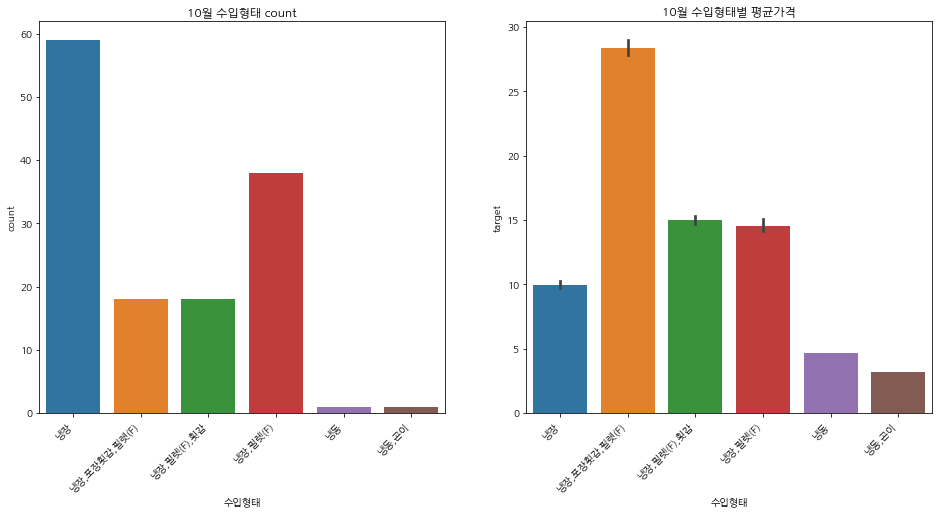

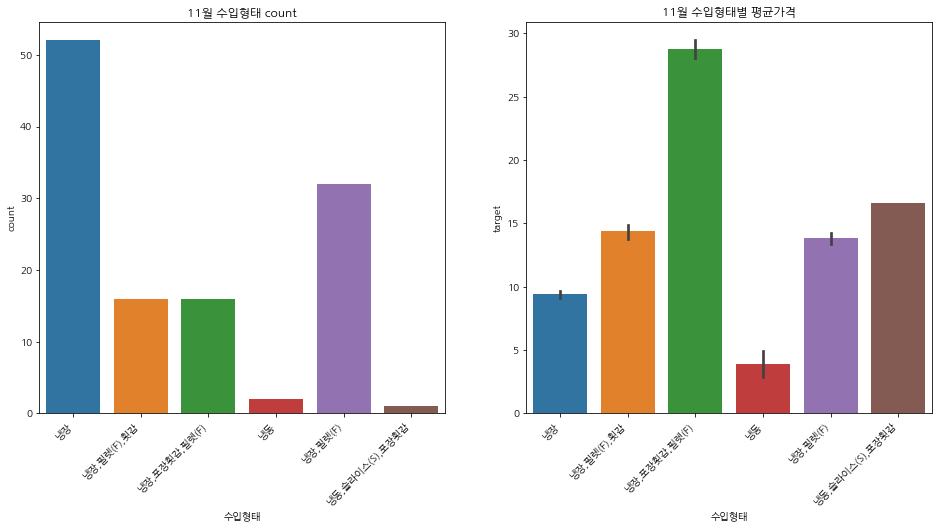

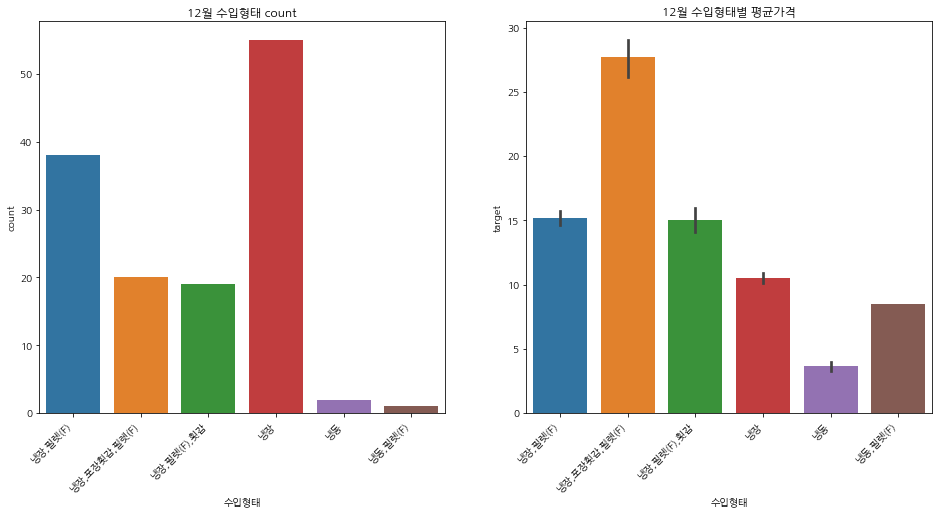

In [56]:
# 월별 수입형태가 어떻게 변화하였는가?
for i in sorted(train_연어['month'].unique()):
  fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
  sns.countplot(train_연어[train_연어['month'] == i]['수입형태'], ax = ax[0])
  sns.barplot(data = train_연어[train_연어['month'] == i], x = '수입형태', y = 'target', ax = ax[1])
  fig.autofmt_xdate(rotation=45)
  ax[0].set_title(f'{i}월 수입형태 count')
  ax[1].set_title(f'{i}월 수입형태별 평균가격')

In [57]:
train_연어

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target,month,year,day,difference
74,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",12.936815,12,2015,28,0
129,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",19.146755,12,2015,28,0
168,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F),횟감",12.082384,12,2015,28,0
174,2015-12-28,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",13.425826,12,2015,28,0
198,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,냉장,8.844281,12,2015,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41994,2019-12-30,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",16.495971,12,2019,30,0
41995,2019-12-30,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F),횟감",18.350634,12,2019,30,0
42044,2019-12-30,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,냉장,11.128269,12,2019,30,0
42056,2019-12-30,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",15.631531,12,2019,30,0


In [58]:
data = pd.get_dummies(train_연어, columns = ['제조국','수입용도','수입형태','month']).drop(['제품구분','수출국','어종','상세어종','중분류명 카테고리','year','day'], axis = 1)
data

,기준일,target,difference,제조국_노르웨이,제조국_뉴질랜드,제조국_러시아,제조국_미국,제조국_베트남,제조국_아이슬란드,제조국_아일랜드,제조국_영국,제조국_칠레,제조국_캐나다,제조국_호주,수입용도_외화획득용 원료,수입용도_자사제품제조용,수입용도_판매용,수입형태_냉동,"수입형태_냉동,곤이","수입형태_냉동,슬라이스(S),포장횟감","수입형태_냉동,필렛(F)",수입형태_냉장,"수입형태_냉장,포장횟감,필렛(F)","수입형태_냉장,필렛(F)","수입형태_냉장,필렛(F),횟감",month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
74,2015-12-28,12.936815,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
129,2015-12-28,19.146755,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
168,2015-12-28,12.082384,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
174,2015-12-28,13.425826,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
198,2015-12-28,8.844281,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41994,2019-12-30,16.495971,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
41995,2019-12-30,18.350634,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
42044,2019-12-30,11.128269,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
42056,2019-12-30,15.631531,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# 다중 공선성이 inf가 나온다.
# 그러므로 이 데이터는 더 추가적인 데이터가 필요하고 몇가지의 데이터가 필요 없다고 판단된다.
vif_data = data.groupby('기준일').mean().reset_index(drop = True)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(vif_data.drop('target', axis = 1).values, i) for i in range(vif_data.drop('target',axis = 1).shape[1])]
vif['features'] = vif_data.drop('target',axis =1).columns
vif

# 데이터 18을 기준으로 binning을 해주자.

Text(0.5, 1.0, 'boxenplot of target')

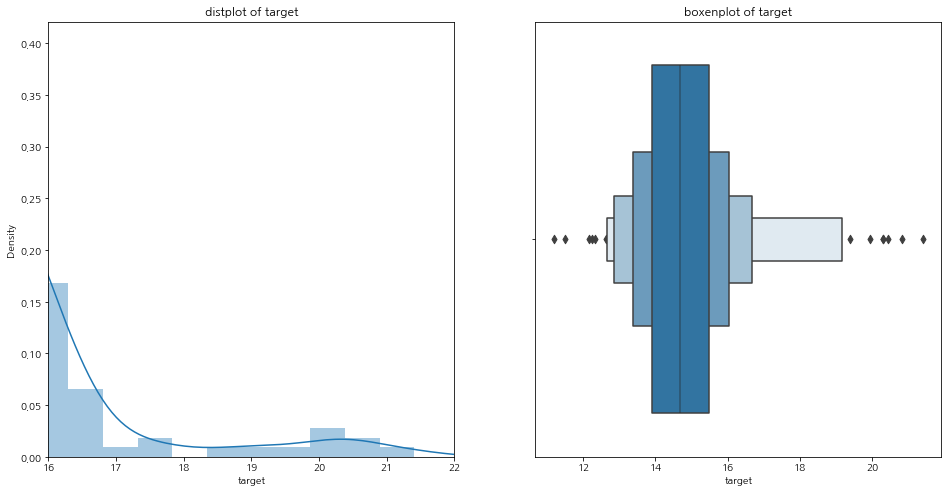

In [76]:
# 18을 기준으로 나누어 주도록 하자.
fig, ax = plt.subplots(ncols =2 , figsize = (16,8))
sns.distplot(vif_data['target'], ax = ax[0])
sns.boxenplot(vif_data['target'], ax = ax[1])
ax[0].set_xlim([16,22])
ax[0].set_title('distplot of target')
ax[1].set_title('boxenplot of target')

In [ ]:
train = data[data['기준일'] < '2019']
val = data[data['기준일'] > '2019']

In [ ]:
train

,기준일,target,difference,제조국_노르웨이,제조국_뉴질랜드,제조국_러시아,제조국_미국,제조국_베트남,제조국_아이슬란드,제조국_아일랜드,제조국_영국,제조국_칠레,제조국_캐나다,제조국_호주,수입용도_외화획득용 원료,수입용도_자사제품제조용,수입용도_판매용,수입형태_냉동,"수입형태_냉동,곤이","수입형태_냉동,슬라이스(S),포장횟감","수입형태_냉동,필렛(F)",수입형태_냉장,"수입형태_냉장,포장횟감,필렛(F)","수입형태_냉장,필렛(F)","수입형태_냉장,필렛(F),횟감",month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
74,2015-12-28,12.936815,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
129,2015-12-28,19.146755,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
168,2015-12-28,12.082384,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
174,2015-12-28,13.425826,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
198,2015-12-28,8.844281,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31529,2018-12-31,15.867836,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
31606,2018-12-31,9.816562,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
31643,2018-12-31,14.241566,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
31658,2018-12-31,14.543172,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
val

,기준일,target,difference,제조국_노르웨이,제조국_뉴질랜드,제조국_러시아,제조국_미국,제조국_베트남,제조국_아이슬란드,제조국_아일랜드,제조국_영국,제조국_칠레,제조국_캐나다,제조국_호주,수입용도_외화획득용 원료,수입용도_자사제품제조용,수입용도_판매용,수입형태_냉동,"수입형태_냉동,곤이","수입형태_냉동,슬라이스(S),포장횟감","수입형태_냉동,필렛(F)",수입형태_냉장,"수입형태_냉장,포장횟감,필렛(F)","수입형태_냉장,필렛(F)","수입형태_냉장,필렛(F),횟감",month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
31671,2019-01-07,9.418883,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
31700,2019-01-07,29.312178,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
31772,2019-01-07,15.839713,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
31773,2019-01-07,10.516218,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
31845,2019-01-07,14.499471,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41994,2019-12-30,16.495971,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
41995,2019-12-30,18.350634,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
42044,2019-12-30,11.128269,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
42056,2019-12-30,15.631531,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# 각 컬럼을 평균을 시켜주면 어떨까?
train = train.groupby('기준일').mean().reset_index(drop = True)
val = val.groupby('기준일').mean().reset_index(drop = True)

In [ ]:
train

,target,difference,제조국_노르웨이,제조국_뉴질랜드,제조국_러시아,제조국_미국,제조국_베트남,제조국_아이슬란드,제조국_아일랜드,제조국_영국,제조국_칠레,제조국_캐나다,제조국_호주,수입용도_외화획득용 원료,수입용도_자사제품제조용,수입용도_판매용,수입형태_냉동,"수입형태_냉동,곤이","수입형태_냉동,슬라이스(S),포장횟감","수입형태_냉동,필렛(F)",수입형태_냉장,"수입형태_냉장,포장횟감,필렛(F)","수입형태_냉장,필렛(F)","수입형태_냉장,필렛(F),횟감",month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,13.287212,0.000,1.000000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.000000,0.000,0.000,0.200000,0.800000,0.000,0.0,0.0,0.000,0.200000,0.200000,0.400000,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,12.331994,0.000,0.857143,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.142857,0.000,0.000,0.285714,0.714286,0.000,0.0,0.0,0.000,0.428571,0.142857,0.285714,0.142857,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12.876513,0.000,1.000000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.000000,0.000,0.000,0.333333,0.666667,0.000,0.0,0.0,0.000,0.333333,0.166667,0.333333,0.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.387350,0.000,1.000000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.000000,0.000,0.000,0.333333,0.666667,0.000,0.0,0.0,0.000,0.333333,0.166667,0.333333,0.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12.644323,0.000,1.000000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.000000,0.000,0.000,0.333333,0.666667,0.000,0.0,0.0,0.000,0.166667,0.166667,0.333333,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,13.097665,0.000,0.750000,0.000,0.125,0.000,0.0,0.0,0.0,0.000,0.0,0.000000,0.125,0.125,0.375000,0.500000,0.125,0.0,0.0,0.000,0.375000,0.125000,0.250000,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
154,13.925410,0.125,0.750000,0.000,0.000,0.125,0.0,0.0,0.0,0.000,0.0,0.000000,0.125,0.000,0.375000,0.625000,0.000,0.0,0.0,0.125,0.375000,0.125000,0.250000,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
155,15.695383,0.000,0.750000,0.125,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.000000,0.125,0.000,0.375000,0.625000,0.000,0.0,0.0,0.000,0.375000,0.250000,0.250000,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
156,14.042605,0.000,0.750000,0.000,0.000,0.000,0.0,0.0,0.0,0.125,0.0,0.000000,0.125,0.000,0.375000,0.625000,0.000,0.0,0.0,0.000,0.500000,0.125000,0.250000,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 44 kB/s 


# 모델 돌려보기

In [ ]:
# 모든 모델을 돌려서 rmse를 측정해 보자.
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

X_train, y_train = train.drop('target', axis = 1), train['target']
X_val, y_val = val.drop('target', axis = 1), val['target']

models = {'lightgbm':LGBMRegressor(random_state = 42), 'xgboost':XGBRegressor(random_state = 42),'catboost': CatBoostRegressor(random_state = 42),'lr': LinearRegression(),'ridge': Ridge(random_state = 42),'lasso': Lasso(),'rfg':RandomForestRegressor(),'gb':GradientBoostingRegressor()}
model_rmse = {}
for i,j in models.items():
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  RMSE = mean_squared_error(y_val, y_pred) ** 0.5

  model_rmse[i] = RMSE

# 가장 좋은 성능을 내는 모델 찾아서 맞추기
print(sorted(model_rmse.items(), key = lambda item:item[1]))

[12:26:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.028104
0:	learn: 1.6937720	total: 46.4ms	remaining: 46.3s
1:	learn: 1.6835886	total: 47.1ms	remaining: 23.5s
2:	learn: 1.6748674	total: 47.7ms	remaining: 15.8s
3:	learn: 1.6639274	total: 48.1ms	remaining: 12s
4:	learn: 1.6544505	total: 48.6ms	remaining: 9.68s
5:	learn: 1.6448125	total: 49.1ms	remaining: 8.13s
6:	learn: 1.6369570	total: 49.6ms	remaining: 7.04s
7:	learn: 1.6270857	total: 50.1ms	remaining: 6.21s
8:	learn: 1.6168677	total: 50.4ms	remaining: 5.55s
9:	learn: 1.6087599	total: 50.8ms	remaining: 5.03s
10:	learn: 1.6018190	total: 51.3ms	remaining: 4.61s
11:	learn: 1.5956722	total: 51.7ms	remaining: 4.26s
12:	learn: 1.5883757	total: 52.2ms	remaining: 3.96s
13:	learn: 1.5807865	total: 52.6ms	remaining: 3.71s
14:	learn: 1.5715478	total: 53.3ms	remaining: 3.5s
15:	learn: 1.5650806	total: 53.9ms	remaining: 3.31s
16:	learn: 1.5596971	tot

## Stacking

In [ ]:
!pip install vecstack

  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19878 sha256=fc5d9d8a1dccb446b4f38fac39e07a71b77224ee6013a8afc5be49f8bd71953d
  Stored in directory: /root/.cache/pip/wheels/28/fe/0c/fe8e43660e3316d7ce204e59a79a72246c0ae9b6c5c79841c8
Successfully built vecstack


In [ ]:
from vecstack import stacking

def rmse(y, y_pred):
  return np.sqrt(mean_squared_error(y,y_pred))

lgb = LGBMRegressor(random_state =42)
xgb = XGBRegressor(random_state = 42, tree_method = 'gpu_hist')
catboost = CatBoostRegressor(random_state =42, task_type = 'GPU')
rfg = RandomForestRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
# lr = LinearRegression()
# gb = GradientBoostingRegressor(random_state = 42)

models = [lgb,xgb , catboost, ridge, rfg,]# lr, gb]

S_train, S_test = stacking(models, X_train, y_train, X_val, regression = True, mode = 'oof_pred_bag', metric  = rmse, n_folds =5, random_state = 42)

lgb = LGBMRegressor(random_state = 42)
lgb.fit(S_train, y_train)
y_pred = lgb.predict(S_test)
RMSE = rmse(y_val, y_pred)

print(RMSE)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
5:	learn: 1.5385833	total: 44.2ms	remaining: 7.32s
6:	learn: 1.5296689	total: 49.3ms	remaining: 6.99s
7:	learn: 1.5147065	total: 57.9ms	remaining: 7.17s
8:	learn: 1.5003884	total: 66.4ms	remaining: 7.31s
9:	learn: 1.4940072	total: 72ms	remaining: 7.12s
10:	learn: 1.4758268	total: 80.6ms	remaining: 7.25s
11:	learn: 1.4560467	total: 88.4ms	remaining: 7.28s
12:	learn: 1.4475329	total: 95.9ms	remaining: 7.28s
13:	learn: 1.4292132	total: 101ms	remaining: 7.12s
14:	learn: 1.4194227	total: 108ms	remaining: 7.12s
15:	learn: 1.4099970	total: 116ms	remaining: 7.13s
16:	learn: 1.3965611	total: 121ms	remaining: 6.97s
17:	learn: 1.3820470	total: 128ms	remaining: 6.99s
18:	learn: 1.3721570	total: 136ms	remaining: 7s
19:	learn: 1.3681615	total: 140ms	remaining: 6.87s
20:	learn: 1.3611790	total: 146ms	remaining: 6.79s
21:	learn: 1.3557838	total: 155ms	remaining: 6.87s
22:	learn: 1.3521827	total: 160ms	remaining: 6.81s
23:	learn: 1.3478522	total: 165ms	remaining: 6.7

## Voting Ensemble

In [ ]:
from sklearn.ensemble import VotingRegressor

lr = LinearRegression()
lgb = LGBMRegressor(random_state = 42)
cat = CatBoostRegressor(random_state = 42)
xgb = XGBRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
rfg = RandomForestRegressor(random_state = 42)
gb = GradientBoostingRegressor(random_state = 42)


vo_reg = VotingRegressor(estimators = [('lr',lr),('lgb',lgb),('cat',cat),('xgb',xgb),('ridge',ridge),('rfg',rfg),('gb',gb)], n_jobs = 3)
vo_reg.fit(X_train, y_train)
y_pred = vo_reg.predict(X_val)

RMSE = rmse(y_val, y_pred)


print(RMSE)

1.0916492319012225


# Feature Importance


In [ ]:
# statsmodel로 통계량 보기
import statsmodels.api as sm

X = train.drop('target', axis = 1)
y = train['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     4.530
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           1.31e-09
Time:                        12:28:00   Log-Likelihood:                -252.54
No. Observations:                 158   AIC:                             565.1
Df Residuals:                     128   BIC:                             657.0
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
difference               4.8724 

[12:28:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Text(0.5, 0, 'Xgboost Feature Importance')

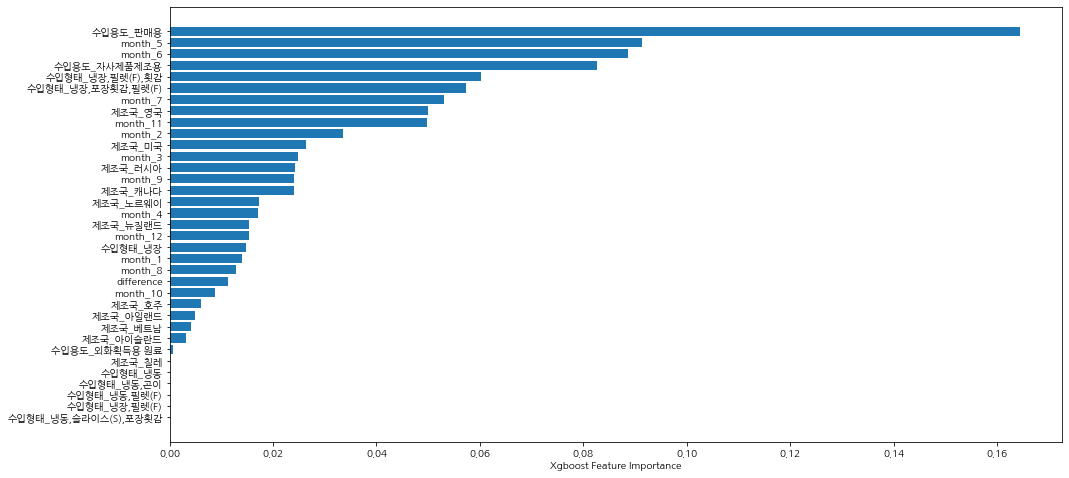

In [ ]:
# XGB importance
model = XGBRegressor(random_state =42)
model.fit(train.drop('target', axis = 1), train['target'])

sorted_idx = model.feature_importances_.argsort()

plt.figure(figsize = (16,8))
plt.barh(train.drop('target', axis = 1).columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel('Xgboost Feature Importance')